生鮮野菜の価格予測（Nishika）

2022/8/8締切

# データの読み込み

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import japanize_matplotlib

In [4]:
import seaborn as sns
sns.set

<function seaborn.rcmod.set(*args, **kwargs)>

In [77]:
import datetime

In [6]:
pd.read_excel('data_explanation.xlsx', sheet_name=0)

ファイル名           内容
0              train.csv       訓練用データ
1               test.csv       評価用データ
2            weather.csv        天候データ
3  sample_submission.csv  投稿データフォーマット

In [7]:
pd.read_excel('data_explanation.xlsx', sheet_name=1)

ファイル名           カラム名                                          内容
0     train.csv           kind                                       野菜の種類
1           NaN           date                                          日付
2           NaN         amount     卸売数量合計（合計の意味は、複数産地のものがあればその合計をとっているの意味）
3           NaN     mode_price  卸売価格中央値（中央値の意味は、複数産地のものがあればその中央値をとっているの意味）
4           NaN           area                  産地。複数産地のものが売られていた場合は"_"で結合
5      test.csv           kind                                       野菜の種類
6           NaN           date                                          日付
7           NaN           area                  産地。複数産地のものが売られていた場合は"_"で結合
8   weather.csv           date                                          日付
9           NaN      mean_temp                                     平均気温（℃）
10          NaN       max_temp                                     最高気温（℃）
11          NaN  max_temp_time                                 最高気温（℃）（時分）
12          NaN       min_temp                                     最低気温（℃）
13          NaN  min_temp_time                                 最低気温（℃）（時分）
14          NaN       sum_rain                                   降水量合計（mm）
15          NaN       sun_time                                    日照時間（時間）
16          NaN     mean_humid                                     平均湿度（%）
17          NaN           area                                         エリア

In [8]:
import openpyxl
data_exp = openpyxl.load_workbook('data_explanation.xlsx')
print(data_exp.sheetnames)

['データ説明', '\u3000カラム説明']


In [9]:
data_exp[data_exp.sheetnames[0]]

<Worksheet "データ説明">

In [10]:
train_raw = pd.read_csv('train.csv')
train_raw

kind      date  amount  mode_price      area
0      だいこん  20051107  201445       735.0        千葉
1      だいこん  20051108  189660       840.0  千葉_各地_青森
2      だいこん  20051110  218166       735.0  千葉_各地_青森
3      だいこん  20051111  182624       682.5     千葉_青森
4      だいこん  20051112  220691       682.5     千葉_青森
...     ...       ...     ...         ...       ...
97777   しめじ  20170526   17231        48.5     新潟_長野
97778   しめじ  20170527   17105        48.5     新潟_長野
97779   しめじ  20170529   12406        48.5     新潟_長野
97780   しめじ  20170530   12320        48.5     新潟_長野
97781   しめじ  20170531   11635        43.0     新潟_長野

[97782 rows x 5 columns]

In [11]:
test_raw = pd.read_csv('test.csv')
test_raw

kind      date      area
0     だいこん  20220502  千葉_各地_青森
1     だいこん  20220506  千葉_各地_青森
2     だいこん  20220507  千葉_各地_青森
3     だいこん  20220509  千葉_各地_青森
4     だいこん  20220510  千葉_各地_青森
..     ...       ...       ...
315  ミニトマト  20220526     各地_愛知
316  ミニトマト  20220527     各地_愛知
317  ミニトマト  20220528     各地_愛知
318  ミニトマト  20220530     各地_愛知
319  ミニトマト  20220531     各地_愛知

[320 rows x 3 columns]

In [12]:
weather_raw = pd.read_csv('weather.csv')
weather_raw

date  mean_temp  max_temp     max_temp_time  min_temp  \
0       20041106       13.1      20.1   2004/11/6 12:50       8.1   
1       20041107        9.6      12.5   2004/11/7 13:40       5.4   
2       20041108        9.0      15.5   2004/11/8 12:51       3.2   
3       20041109       12.2      17.7   2004/11/9 14:40       5.7   
4       20041110       11.6      16.4  2004/11/10 14:42       6.9   
...          ...        ...       ...               ...       ...   
204315  20220426       21.3      23.6   2022/4/26 14:27      17.9   
204316  20220427       23.0      27.7   2022/4/27 13:12      18.9   
204317  20220428       16.9      21.1   2022/4/28 15:03      14.2   
204318  20220429       12.9      16.4   2022/4/29 09:21       9.0   
204319  20220430       12.6      18.4   2022/4/30 14:49       7.4   

           min_temp_time  sum_rain  sun_time  mean_humid area  
0        2004/11/6 05:31       5.0       1.6        77.0   青森  
1        2004/11/7 22:17       0.0       4.1        63.0   青森  
2        2004/11/8 06:28       0.0       8.9        72.0   青森  
3        2004/11/9 02:49       1.5       1.2        85.0   青森  
4       2004/11/10 06:23       0.0       7.5        89.0   青森  
...                  ...       ...       ...         ...  ...  
204315   2022/4/26 04:17       2.5       0.0        89.0   東京  
204316    2022/4/28 0:00       0.5       1.6        79.0   東京  
204317   2022/4/28 22:40       0.0       5.5        57.0   東京  
204318   2022/4/29 23:55      40.0       0.2        86.0   東京  
204319   2022/4/30 05:28       0.0      12.4        64.0   東京  

[204320 rows x 10 columns]

In [13]:
sub_raw = pd.read_csv('sample_submission.csv')
sub_raw

kind      date  mode_price
0     だいこん  20220502           0
1     だいこん  20220506           0
2     だいこん  20220507           0
3     だいこん  20220509           0
4     だいこん  20220510           0
..     ...       ...         ...
315  ミニトマト  20220526           0
316  ミニトマト  20220527           0
317  ミニトマト  20220528           0
318  ミニトマト  20220530           0
319  ミニトマト  20220531           0

[320 rows x 3 columns]

In [14]:
train_raw.isnull().sum()

kind          0
date          0
amount        0
mode_price    0
area          0
dtype: int64

In [15]:
train_raw.describe(include='all')

kind          date         amount    mode_price   area
count   97782  9.778200e+04   97782.000000  97782.000000  97782
unique     44           NaN            NaN           NaN    266
top       トマト           NaN            NaN           NaN    北海道
freq     4379           NaN            NaN           NaN   5410
mean      NaN  2.013619e+07   87095.257246   1341.207081    NaN
std       NaN  4.726274e+04   84438.195701   1304.031597    NaN
min       NaN  2.005111e+07       1.000000     18.500000    NaN
25%       NaN  2.009123e+07   21664.250000    227.000000    NaN
50%       NaN  2.014012e+07   58335.500000   1242.000000    NaN
75%       NaN  2.018020e+07  128100.750000   1890.000000    NaN
max       NaN  2.022043e+07  965216.000000  25920.000000    NaN

In [16]:
train_raw['kind'].unique()

array(['だいこん', 'かぶ', 'にんじん', 'ごぼう', 'れんこん', 'キャベツ', 'レタス', 'はくさい', 'こまつな',
       'ほうれんそう', 'ねぎ', 'しゅんぎく', 'ブロッコリー', 'きゅうり', 'かぼちゃ', 'なす', 'トマト',
       'ピーマン', 'じゃがいも', 'さつまいも', 'さといも', 'たまねぎ', 'なましいたけ', 'セルリー',
       'さやえんどう', 'なのはな', 'たけのこ', 'ふき', 'うど', 'そらまめ', 'アスパラガス', 'ピース',
       'とうもろこし', 'いんげん', 'えだまめ', 'うめ', 'まつたけ', 'オクラ', 'レイシにがうり', 'みずな',
       'ミニトマト', 'にら', 'えのきだけ', 'しめじ'], dtype=object)

In [17]:
len(train_raw['kind'].unique())

44

In [18]:
test_raw['kind'].unique()

array(['だいこん', 'にんじん', 'キャベツ', 'レタス', 'はくさい', 'こまつな', 'ほうれんそう', 'ねぎ',
       'きゅうり', 'トマト', 'ピーマン', 'じゃがいも', 'なましいたけ', 'セルリー', 'そらまめ', 'ミニトマト'],
      dtype=object)

In [19]:
len(test_raw['kind'].unique())

16

In [20]:
len(sub_raw['kind'].unique())

16

In [21]:
# trainのデータをtest['kind']にある種類のみに絞ろうとするができず…

# EDA

## trainデータ

In [22]:
train = train_raw.copy()

### dateをdatetime型に変換

In [23]:
train['date'] = train['date'].astype(str)

In [24]:
train['date'] = pd.to_datetime(train['date'])

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97782 entries, 0 to 97781
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   kind        97782 non-null  object        
 1   date        97782 non-null  datetime64[ns]
 2   amount      97782 non-null  int64         
 3   mode_price  97782 non-null  float64       
 4   area        97782 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 3.7+ MB


In [26]:
train.describe(include='all')

C:\Users\09de1\AppData\Local\Temp\ipykernel_18612\4198708820.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  train.describe(include='all')


kind                 date         amount    mode_price   area
count   97782                97782   97782.000000  97782.000000  97782
unique     44                 4379            NaN           NaN    266
top       トマト  2017-05-31 00:00:00            NaN           NaN    北海道
freq     4379                   28            NaN           NaN   5410
first     NaN  2005-11-07 00:00:00            NaN           NaN    NaN
last      NaN  2022-04-30 00:00:00            NaN           NaN    NaN
mean      NaN                  NaN   87095.257246   1341.207081    NaN
std       NaN                  NaN   84438.195701   1304.031597    NaN
min       NaN                  NaN       1.000000     18.500000    NaN
25%       NaN                  NaN   21664.250000    227.000000    NaN
50%       NaN                  NaN   58335.500000   1242.000000    NaN
75%       NaN                  NaN  128100.750000   1890.000000    NaN
max       NaN                  NaN  965216.000000  25920.000000    NaN

### 各野菜の卸売価格（中央値）推移

In [27]:
train = train.set_index('date')

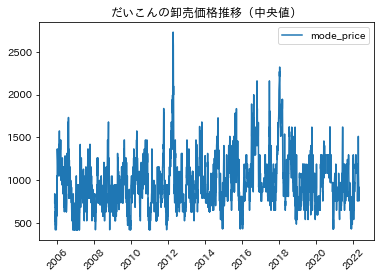

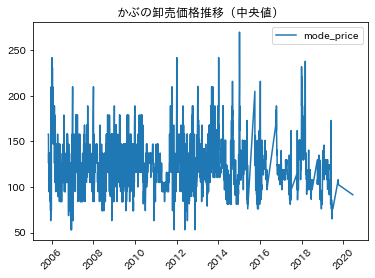

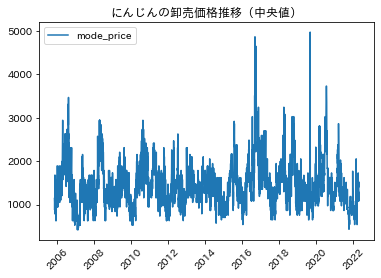

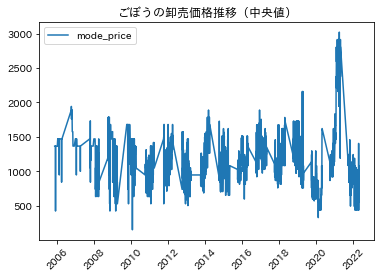

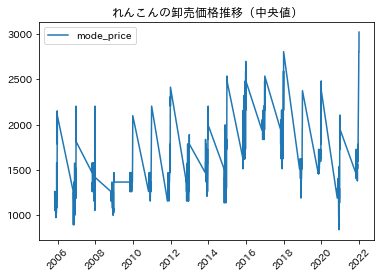

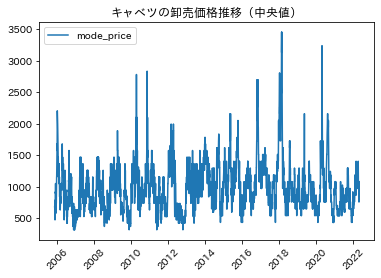

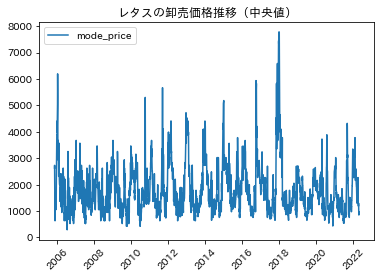

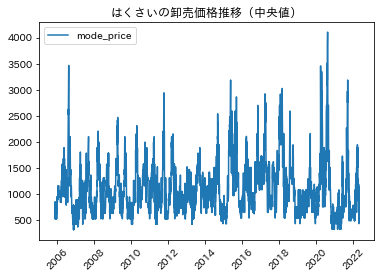

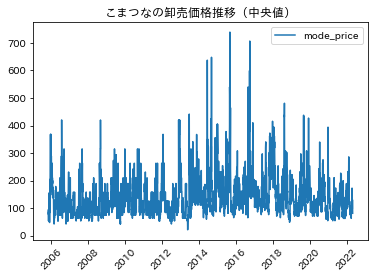

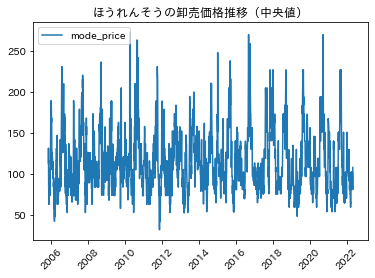

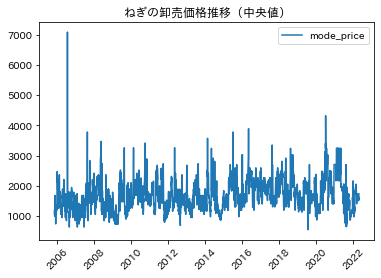

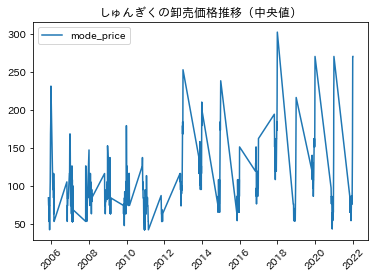

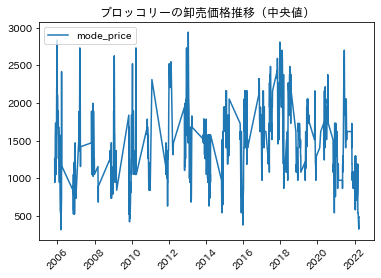

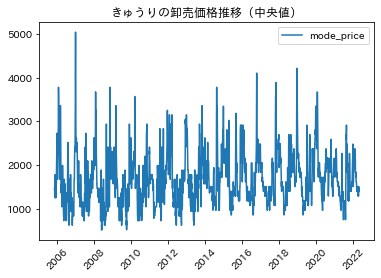

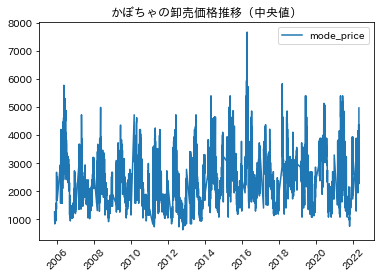

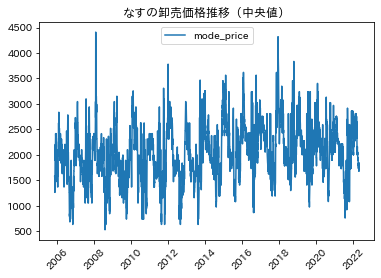

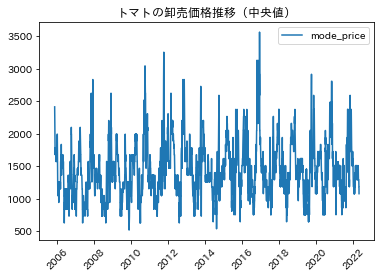

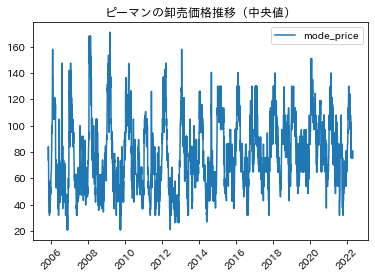

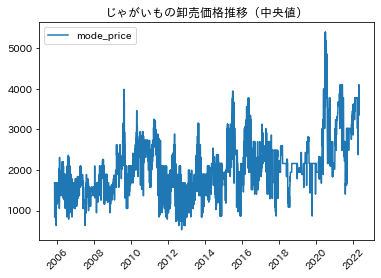

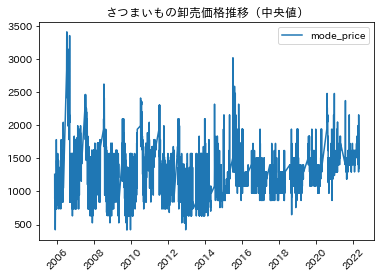

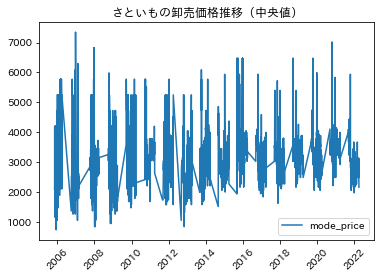

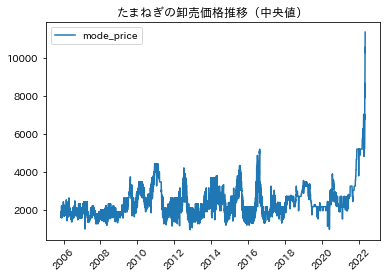

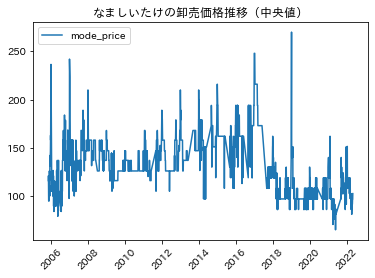

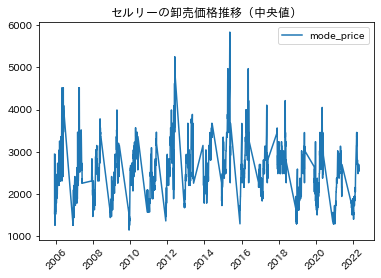

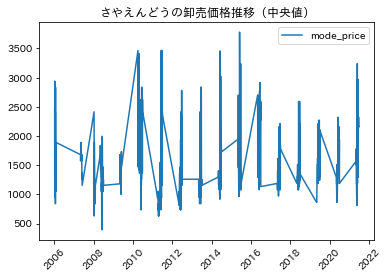

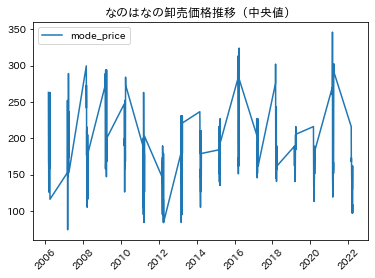

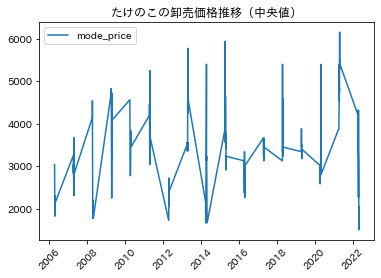

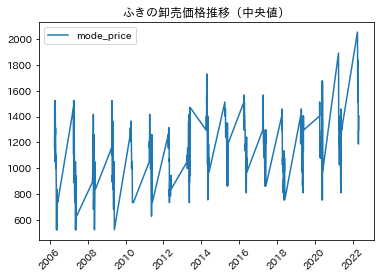

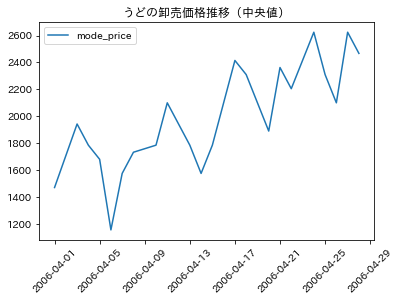

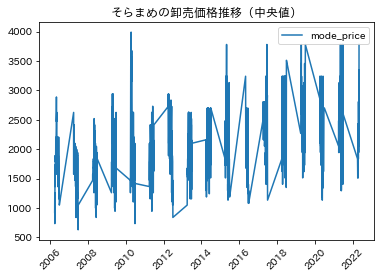

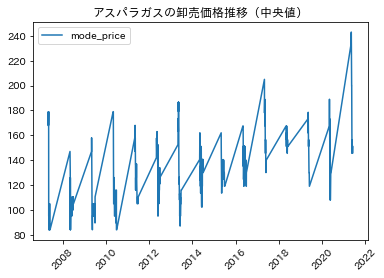

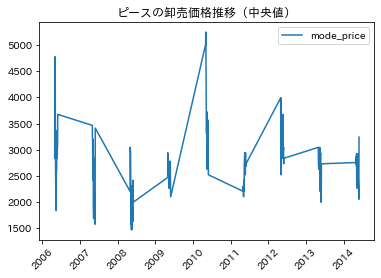

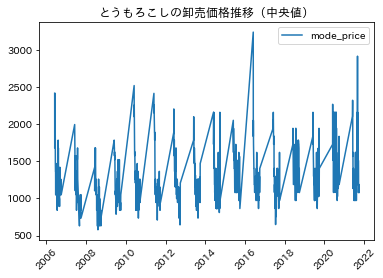

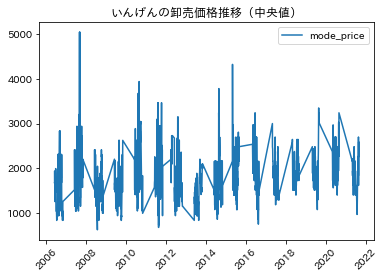

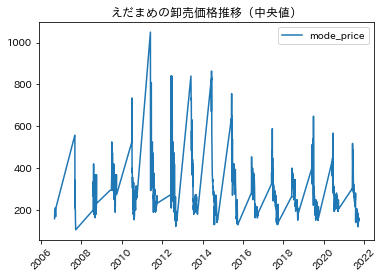

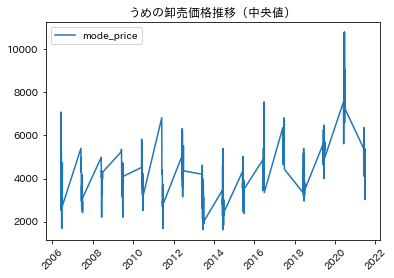

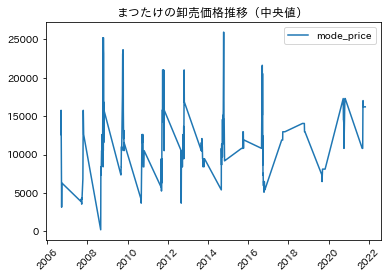

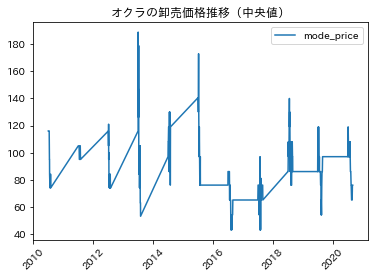

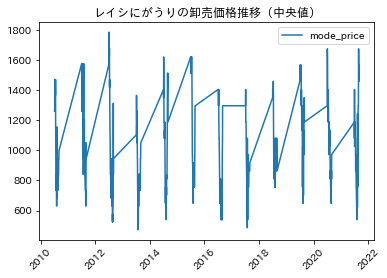

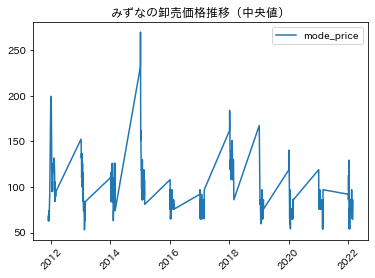

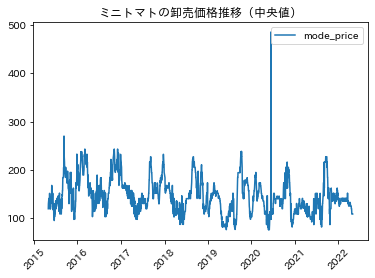

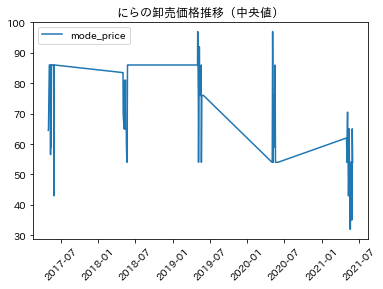

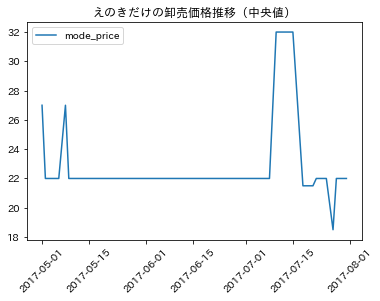

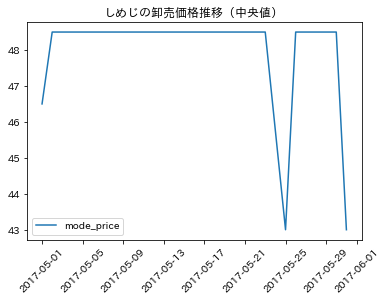

In [28]:
for name in train['kind'].unique():
    train_kind = train[train['kind']==name]
    plt.figure()
    plt.plot(train_kind[['mode_price']])
    plt.title(f'{name}の卸売価格推移（中央値）')
    plt.xticks(rotation=45)
    plt.legend(['mode_price'])
    
    plt.show()

### 各野菜の卸売数量（合計）推移

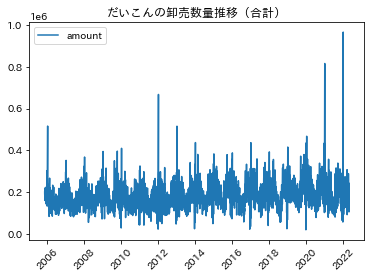

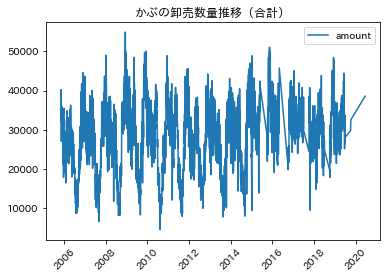

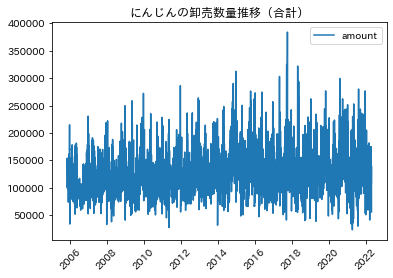

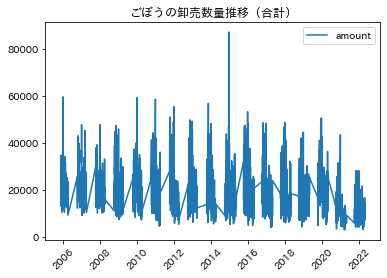

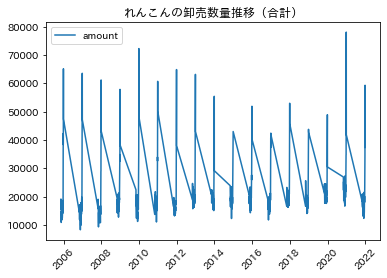

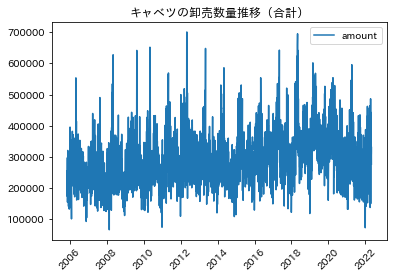

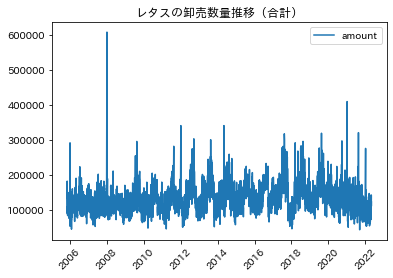

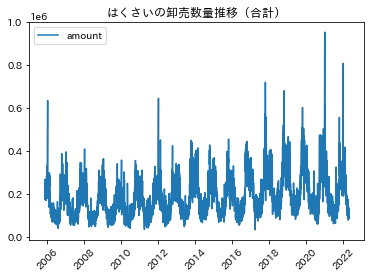

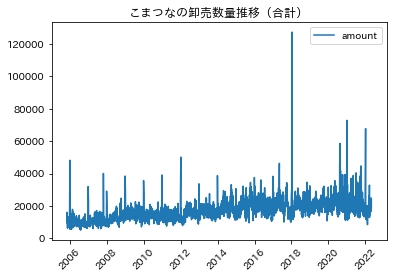

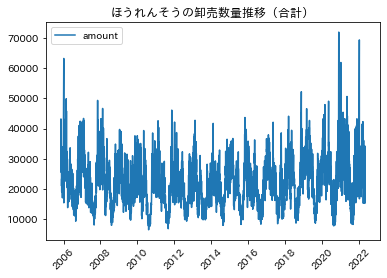

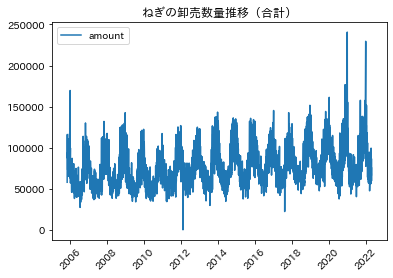

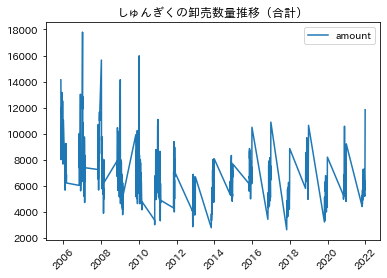

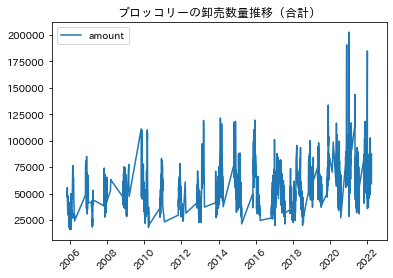

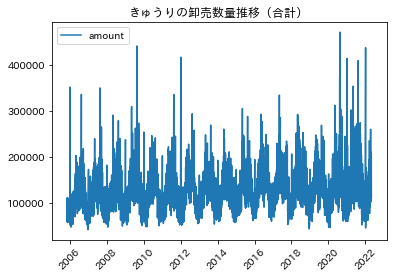

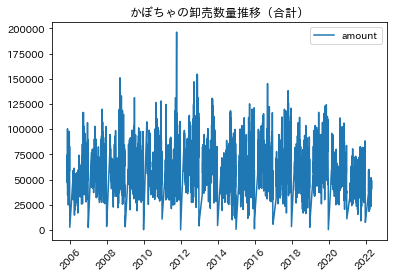

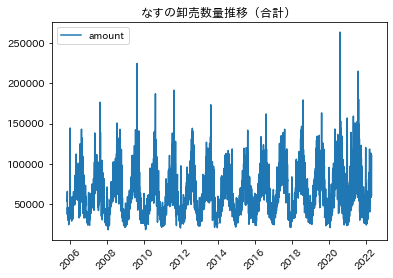

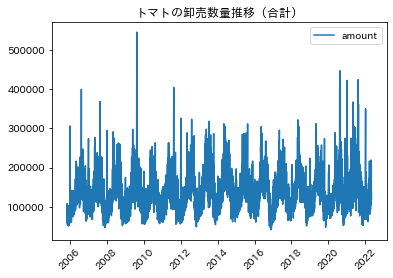

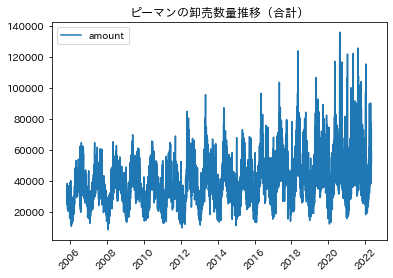

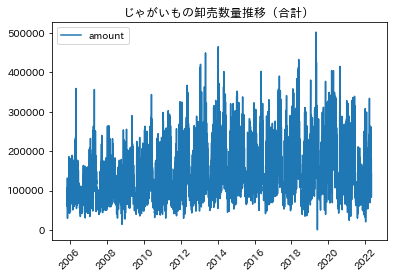

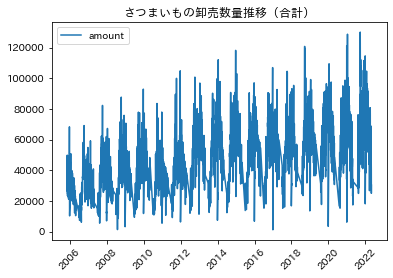

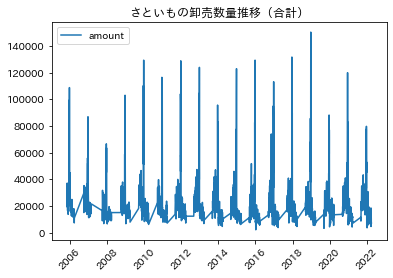

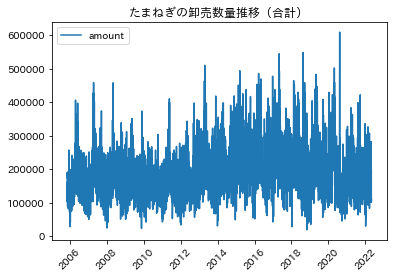

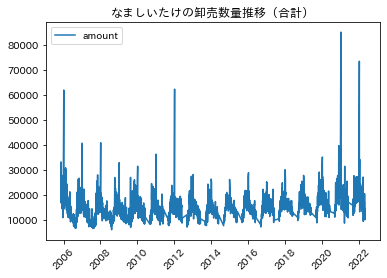

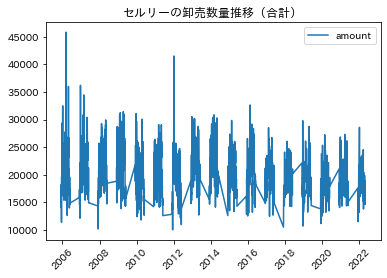

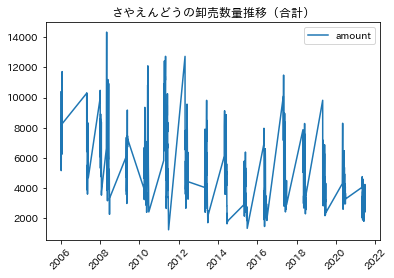

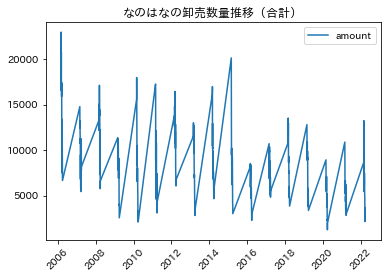

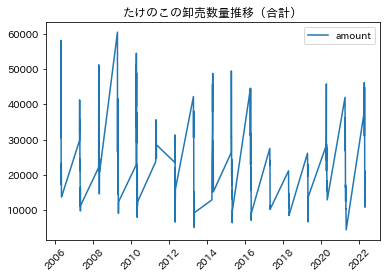

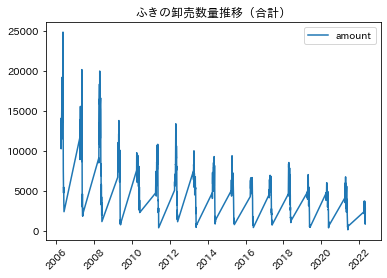

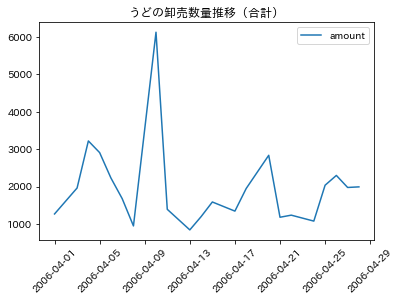

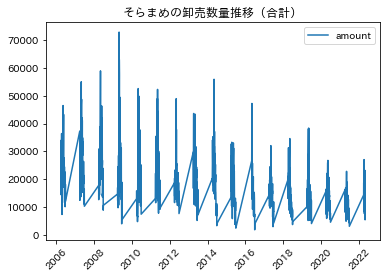

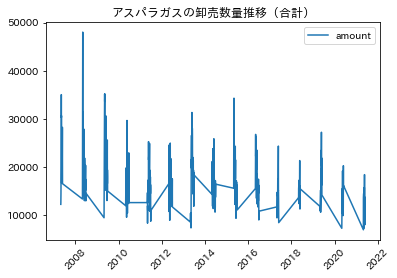

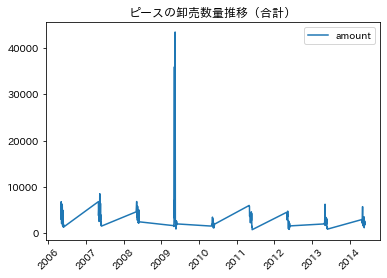

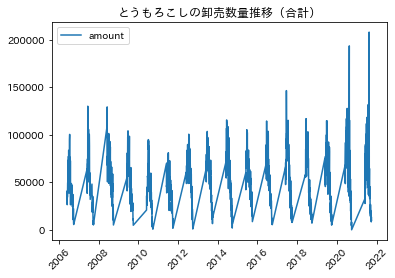

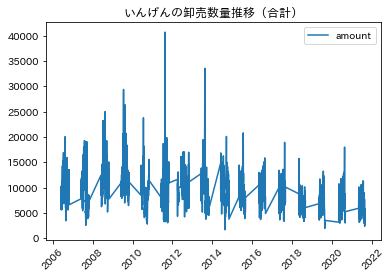

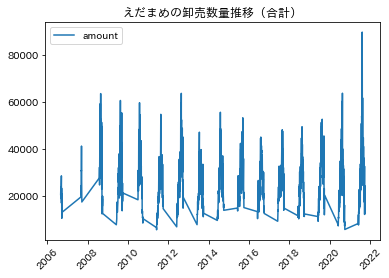

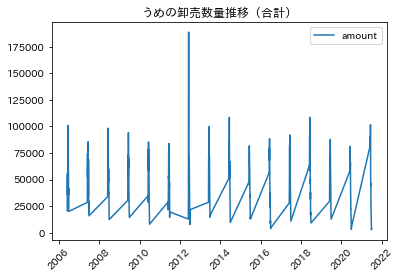

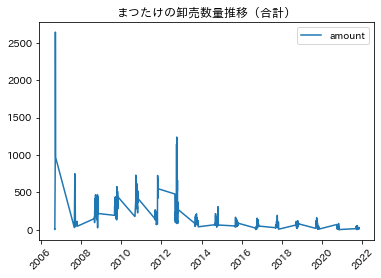

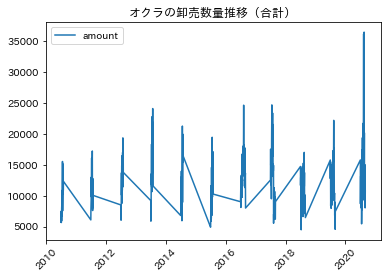

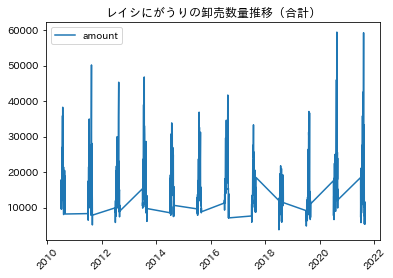

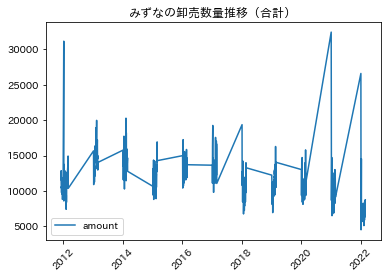

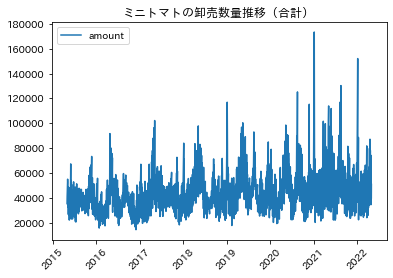

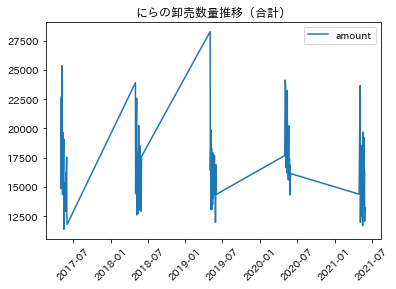

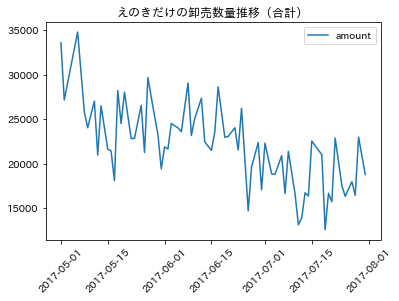

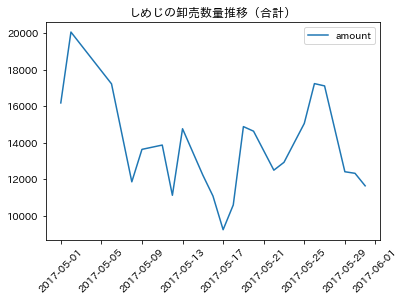

In [29]:
for name in train['kind'].unique():
    train_kind = train[train['kind']==name]
    plt.figure()
    plt.plot(train_kind[['amount']])
    plt.title(f'{name}の卸売数量推移（合計）')
    plt.xticks(rotation=45)
    plt.legend(['amount'])
    
    plt.show()

In [30]:
train = train.reset_index()
train

date  kind  amount  mode_price      area
0     2005-11-07  だいこん  201445       735.0        千葉
1     2005-11-08  だいこん  189660       840.0  千葉_各地_青森
2     2005-11-10  だいこん  218166       735.0  千葉_各地_青森
3     2005-11-11  だいこん  182624       682.5     千葉_青森
4     2005-11-12  だいこん  220691       682.5     千葉_青森
...          ...   ...     ...         ...       ...
97777 2017-05-26   しめじ   17231        48.5     新潟_長野
97778 2017-05-27   しめじ   17105        48.5     新潟_長野
97779 2017-05-29   しめじ   12406        48.5     新潟_長野
97780 2017-05-30   しめじ   12320        48.5     新潟_長野
97781 2017-05-31   しめじ   11635        43.0     新潟_長野

[97782 rows x 5 columns]

### 産地ランキング

In [31]:
train_area = train.copy()
train_area['area'] = train['area'] + '_'

In [32]:
# 「各地」を完全に消すことができない…
# train['area'] = train['area'].str.strip('各地')

In [33]:
train_area_all = train_area['area'].sum()

In [34]:
train_area_all = train_area_all.split('_')

In [35]:
import collections

In [36]:
c = collections.Counter(train_area_all)

In [37]:
area_rank20_train = pd.DataFrame(c.most_common(20),columns=['産地','出現数'])

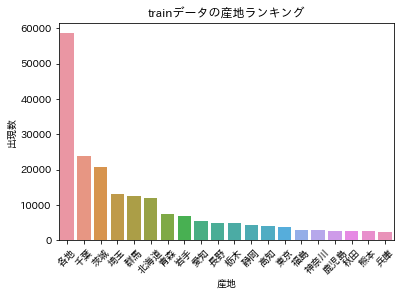

In [38]:
sns.barplot(x='産地', y='出現数', data=area_rank20_train)
plt.title('trainデータの産地ランキング')
plt.xticks(rotation=45)
plt.show()

## testデータ

In [39]:
test = test_raw.copy()

### dateをdatetime型に変換

In [40]:
test['date'] = test['date'].astype(str)
test['date'] = pd.to_datetime(test['date'])
test.describe(include='all')

C:\Users\09de1\AppData\Local\Temp\ipykernel_18612\2475165290.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  test.describe(include='all')


kind                 date      area
count    320                  320       320
unique    16                   20        15
top     だいこん  2022-05-02 00:00:00  千葉_各地_茨城
freq      20                   16        40
first    NaN  2022-05-02 00:00:00       NaN
last     NaN  2022-05-31 00:00:00       NaN

### 産地ランキング

In [41]:
test_area = test.copy()
test_area['area'] = test['area'] + '_'

test_area_all = test_area['area'].sum()

test_area_all = test_area_all.split('_')

c = collections.Counter(test_area_all)

area_rank20_test = pd.DataFrame(c.most_common(20),columns=['産地','出現数'])

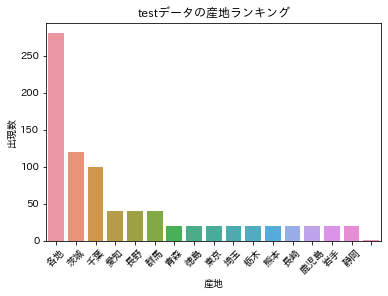

In [42]:
sns.barplot(x='産地', y='出現数', data=area_rank20_test)
plt.title('testデータの産地ランキング')
plt.xticks(rotation=45)
plt.show()

## weatherデータ

In [43]:
weather = weather_raw.copy()

In [44]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204320 entries, 0 to 204319
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   date           204320 non-null  int64  
 1   mean_temp      203953 non-null  float64
 2   max_temp       203953 non-null  float64
 3   max_temp_time  203953 non-null  object 
 4   min_temp       203952 non-null  float64
 5   min_temp_time  203952 non-null  object 
 6   sum_rain       203951 non-null  float64
 7   sun_time       203888 non-null  float64
 8   mean_humid     203922 non-null  float64
 9   area           204320 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 15.6+ MB


### dateをdatetime型に変換

In [45]:
weather.head()

date  mean_temp  max_temp     max_temp_time  min_temp  \
0  20041106       13.1      20.1   2004/11/6 12:50       8.1   
1  20041107        9.6      12.5   2004/11/7 13:40       5.4   
2  20041108        9.0      15.5   2004/11/8 12:51       3.2   
3  20041109       12.2      17.7   2004/11/9 14:40       5.7   
4  20041110       11.6      16.4  2004/11/10 14:42       6.9   

      min_temp_time  sum_rain  sun_time  mean_humid area  
0   2004/11/6 05:31       5.0       1.6        77.0   青森  
1   2004/11/7 22:17       0.0       4.1        63.0   青森  
2   2004/11/8 06:28       0.0       8.9        72.0   青森  
3   2004/11/9 02:49       1.5       1.2        85.0   青森  
4  2004/11/10 06:23       0.0       7.5        89.0   青森

In [46]:
weather['date'] = weather['date'].astype(str)
weather['date'] = pd.to_datetime(weather['date'])

### max_temp_time,min_temp_timeをdatetime型に変換

In [47]:
weather['max_temp_time'] = weather['max_temp_time'].astype(str)
weather['max_temp_time'] = pd.to_datetime(weather['max_temp_time'], format='%Y/%m/%d %H:%M')

weather['min_temp_time'] = weather['min_temp_time'].astype(str)
weather['min_temp_time'] = pd.to_datetime(weather['min_temp_time'], format='%Y/%m/%d %H:%M')

weather.head(5)

date  mean_temp  max_temp       max_temp_time  min_temp  \
0 2004-11-06       13.1      20.1 2004-11-06 12:50:00       8.1   
1 2004-11-07        9.6      12.5 2004-11-07 13:40:00       5.4   
2 2004-11-08        9.0      15.5 2004-11-08 12:51:00       3.2   
3 2004-11-09       12.2      17.7 2004-11-09 14:40:00       5.7   
4 2004-11-10       11.6      16.4 2004-11-10 14:42:00       6.9   

        min_temp_time  sum_rain  sun_time  mean_humid area  
0 2004-11-06 05:31:00       5.0       1.6        77.0   青森  
1 2004-11-07 22:17:00       0.0       4.1        63.0   青森  
2 2004-11-08 06:28:00       0.0       8.9        72.0   青森  
3 2004-11-09 02:49:00       1.5       1.2        85.0   青森  
4 2004-11-10 06:23:00       0.0       7.5        89.0   青森

In [48]:
weather.describe(include='all')

C:\Users\09de1\AppData\Local\Temp\ipykernel_18612\4146844207.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  weather.describe(include='all')
C:\Users\09de1\AppData\Local\Temp\ipykernel_18612\4146844207.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  weather.describe(include='all')
C:\Users\09de1\AppData\Local\Temp\ipykernel_18612\4146844207.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future beha

date      mean_temp       max_temp  \
count                204320  203953.000000  203953.000000   
unique                 6385            NaN            NaN   
top     2004-11-06 00:00:00            NaN            NaN   
freq                     32            NaN            NaN   
first   2004-11-06 00:00:00            NaN            NaN   
last    2022-04-30 00:00:00            NaN            NaN   
mean                    NaN      15.380033      19.898426   
std                     NaN       8.808578       8.977545   
min                     NaN     -16.000000      -9.000000   
25%                     NaN       8.000000      12.700000   
50%                     NaN      15.900000      20.600000   
75%                     NaN      22.700000      27.200000   
max                     NaN      33.900000      41.100000   

              max_temp_time       min_temp        min_temp_time  \
count                203953  203952.000000               203952   
unique               193875            NaN               179559   
top     2017-09-18 00:00:00            NaN  2020-03-29 00:00:00   
freq                      8            NaN                   23   
first   2004-11-06 11:59:00            NaN  2004-11-06 00:24:00   
last    2022-04-30 17:15:00            NaN  2022-04-30 06:07:00   
mean                    NaN      11.549927                  NaN   
std                     NaN       9.183661                  NaN   
min                     NaN     -24.500000                  NaN   
25%                     NaN       3.800000                  NaN   
50%                     NaN      11.700000                  NaN   
75%                     NaN      19.400000                  NaN   
max                     NaN      30.500000                  NaN   

             sum_rain       sun_time     mean_humid    area  
count   203951.000000  203888.000000  203922.000000  204320  
unique            NaN            NaN            NaN      32  
top               NaN            NaN            NaN      青森  
freq              NaN            NaN            NaN    6385  
first             NaN            NaN            NaN     NaN  
last              NaN            NaN            NaN     NaN  
mean         4.420339       5.427207      69.100445     NaN  
std         13.573248       4.048071      13.230785     NaN  
min          0.000000       0.000000      17.000000     NaN  
25%          0.000000       1.300000      60.000000     NaN  
50%          0.000000       5.600000      70.000000     NaN  
75%          2.000000       9.000000      79.000000     NaN  
max        429.500000      14.600000     100.000000     NaN

### dateをインデックスに設定

In [49]:
weather = weather.sort_values('date', ascending=True)
weather = weather.set_index('date')

In [50]:
weather['area'].unique()

array(['青森', '帯広', '福岡', '佐賀', '浜松', '盛岡', '熊本', '甲府', '長崎', '秋田', '長野',
       '熊谷', '宮崎', '新潟', '千葉', '仙台', '前橋', '神戸', '名古屋', '山形', '高松', '那覇',
       '和歌山', '宇都宮', '松山', '福島', '徳島', '高知', '東京', '鹿児島', '横浜', '水戸'],
      dtype=object)

### 各地区の'mean_temp','max_temp','min_temp'を描画

In [51]:
weather_plot_df = weather[['mean_temp','max_temp','min_temp']]

C:\Users\09de1\AppData\Local\Temp\ipykernel_18612\1102597399.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


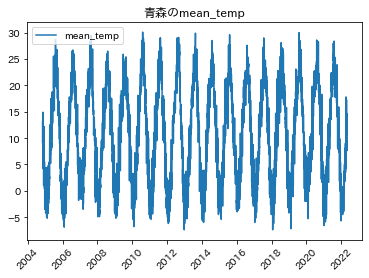

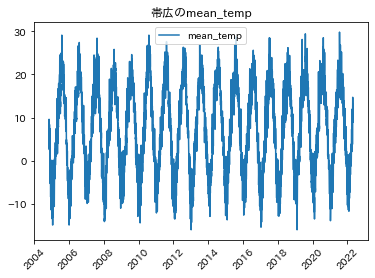

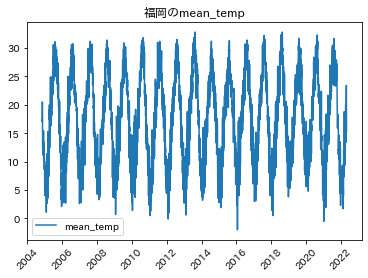

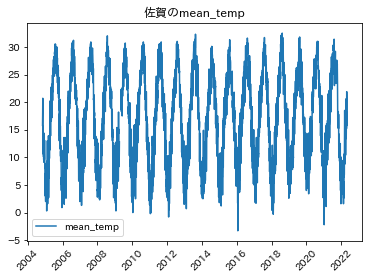

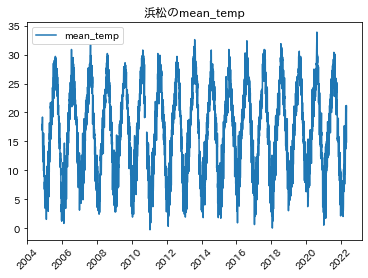

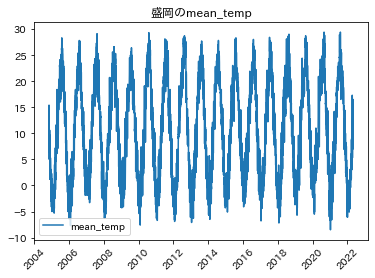

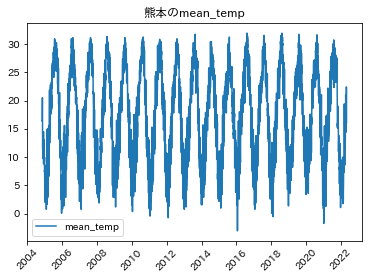

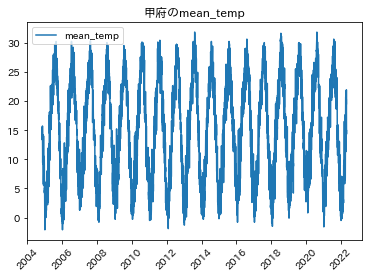

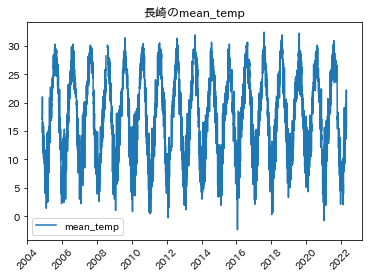

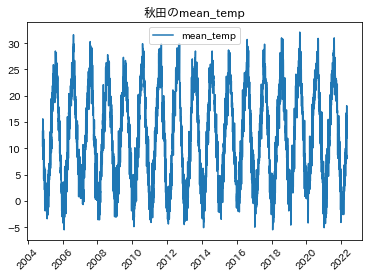

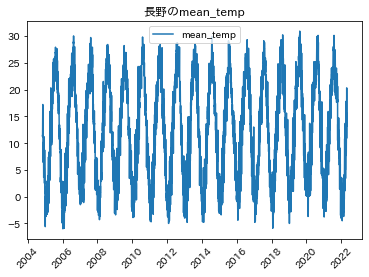

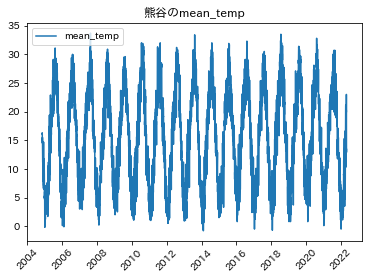

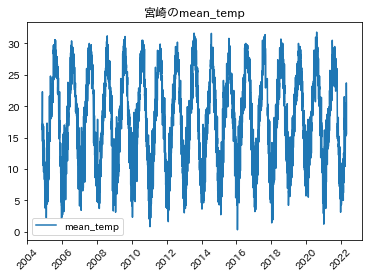

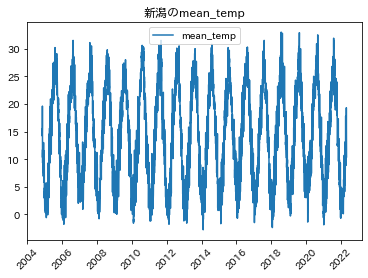

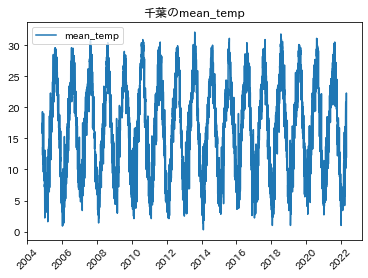

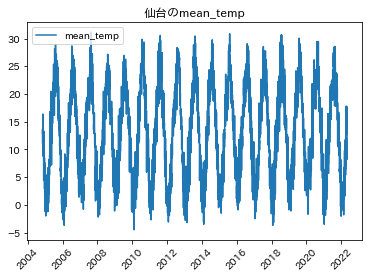

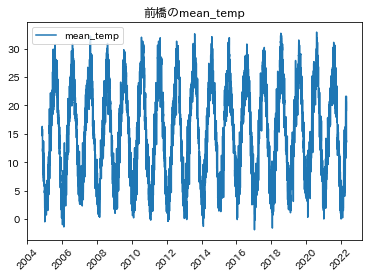

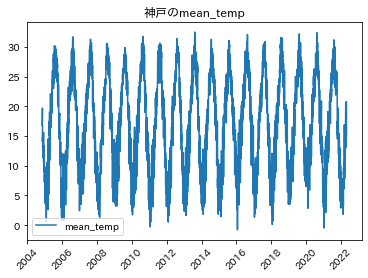

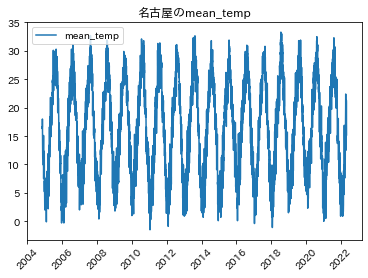

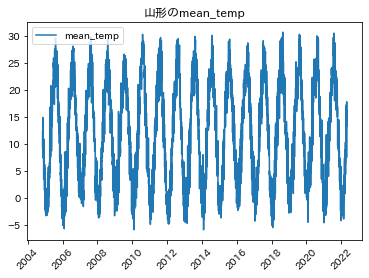

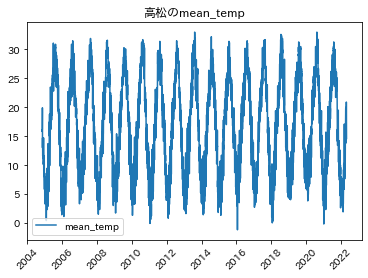

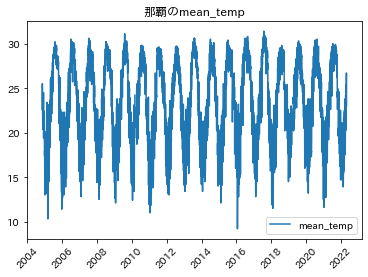

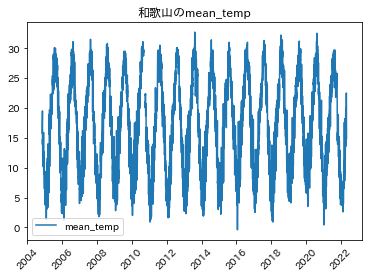

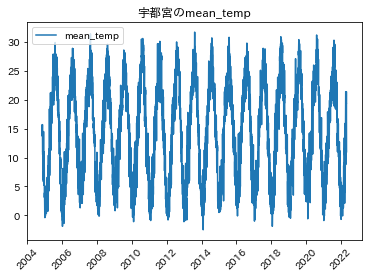

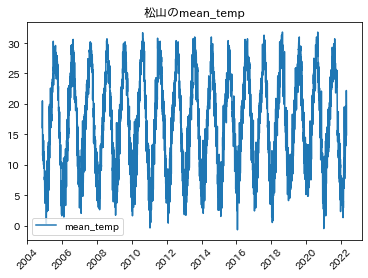

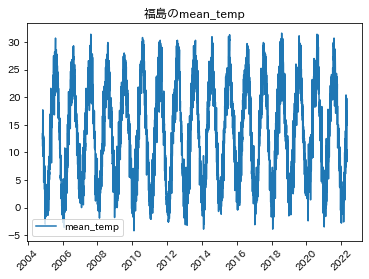

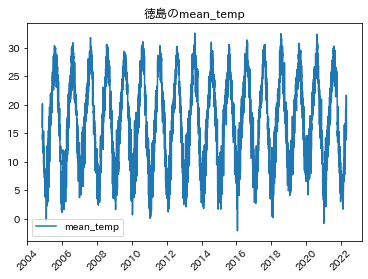

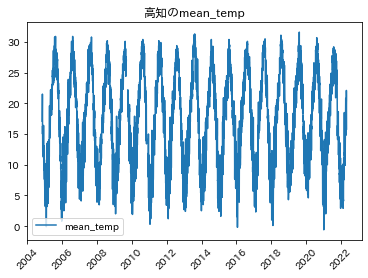

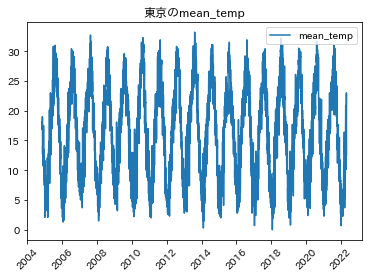

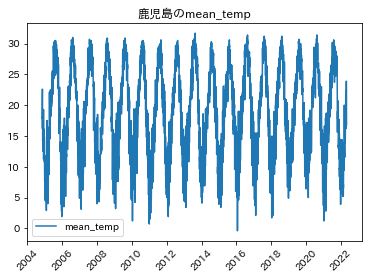

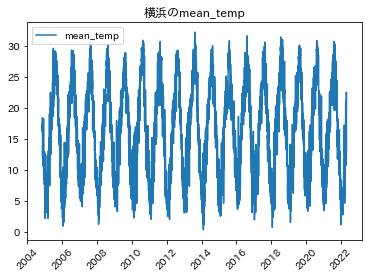

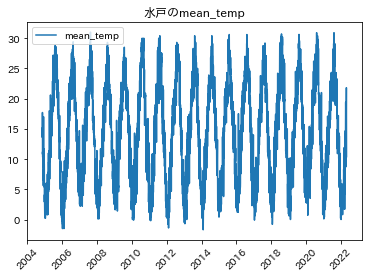

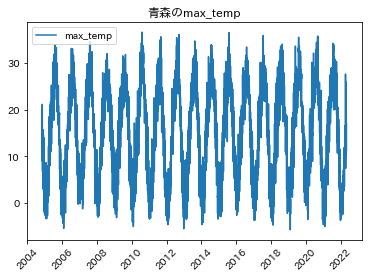

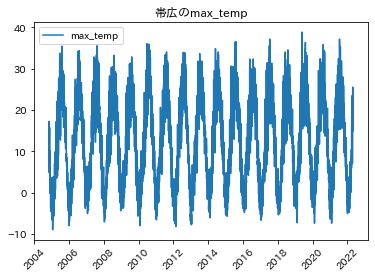

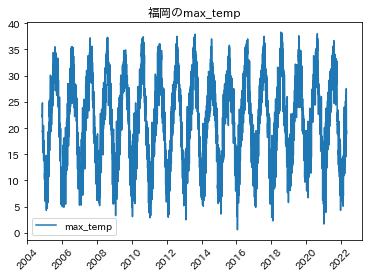

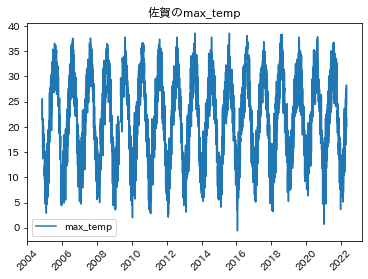

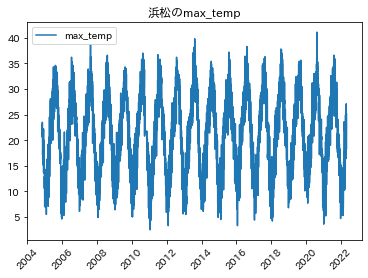

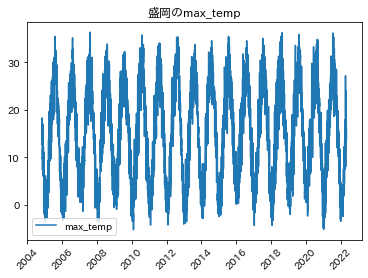

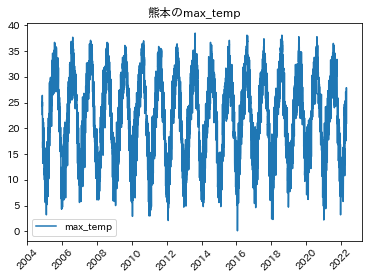

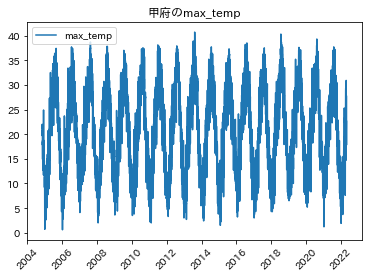

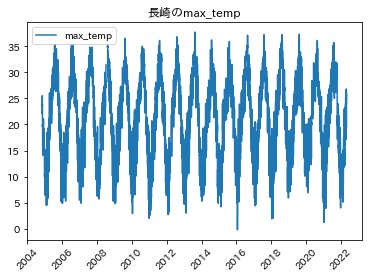

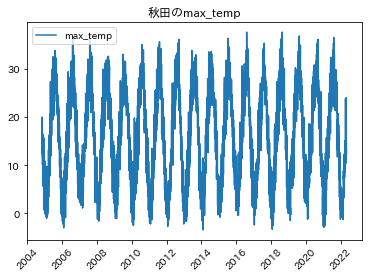

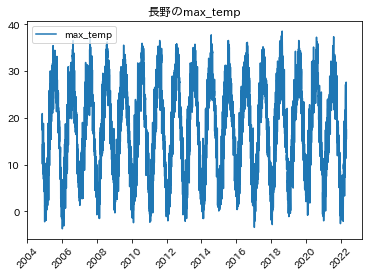

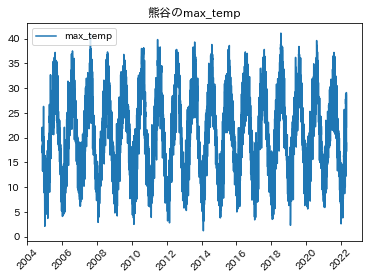

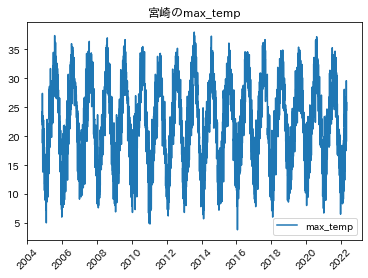

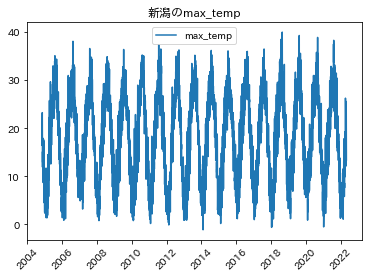

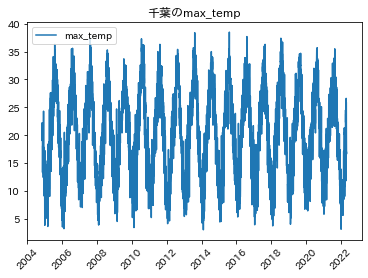

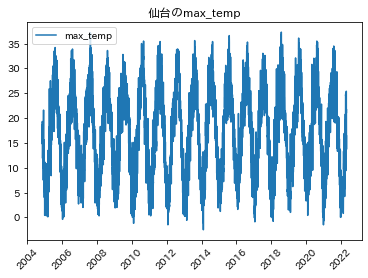

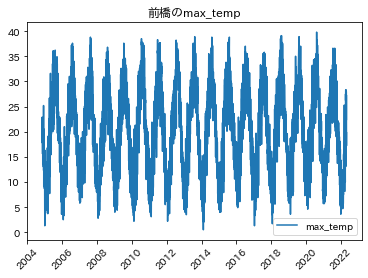

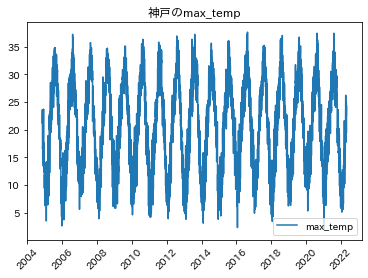

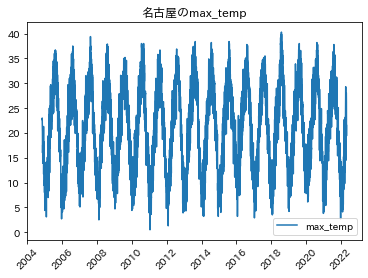

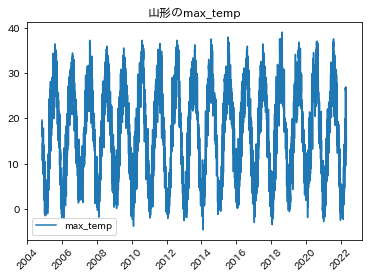

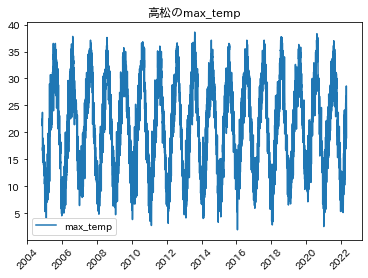

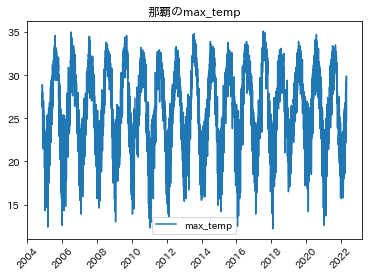

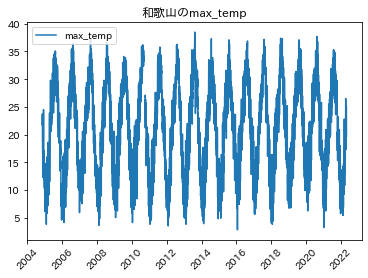

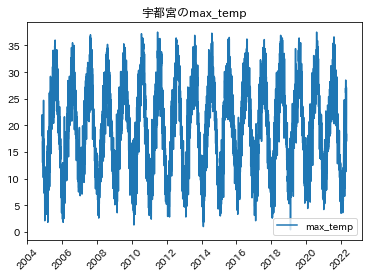

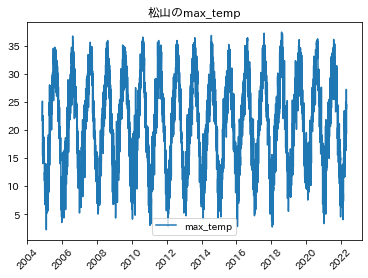

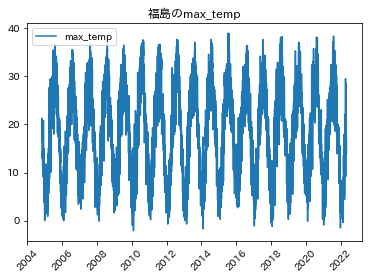

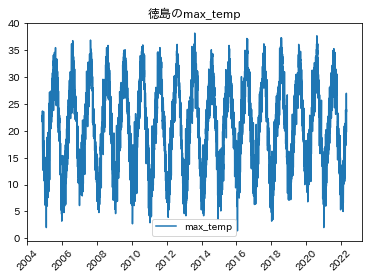

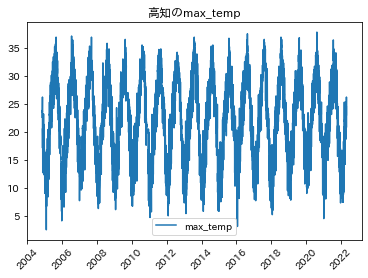

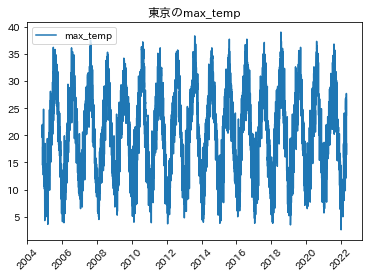

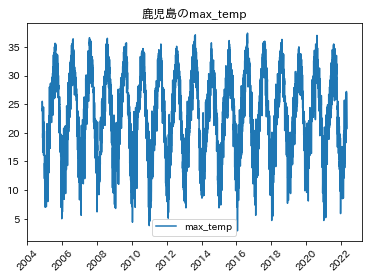

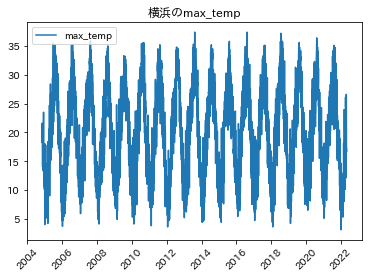

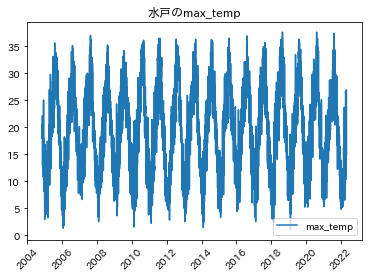

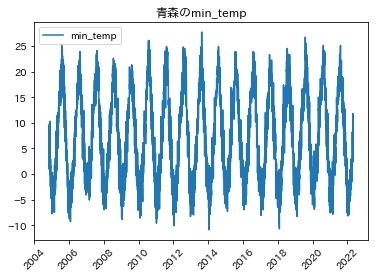

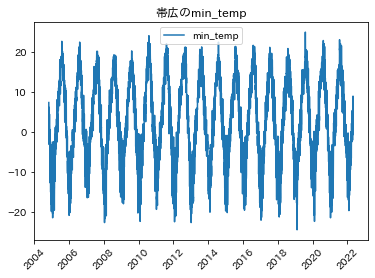

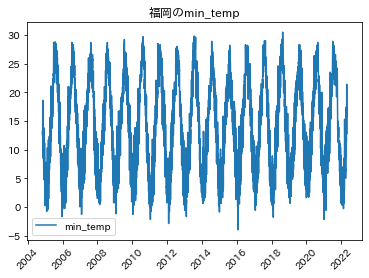

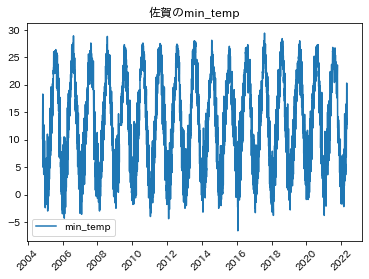

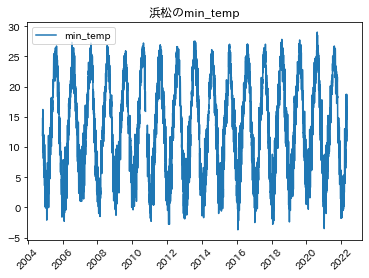

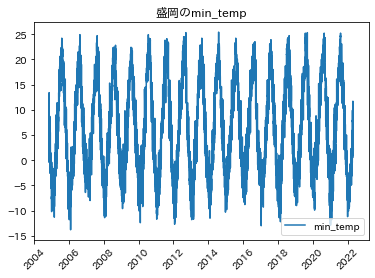

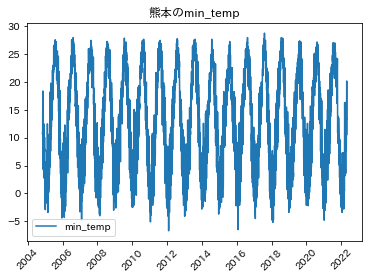

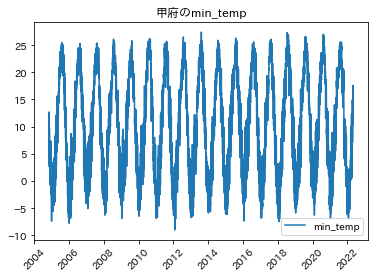

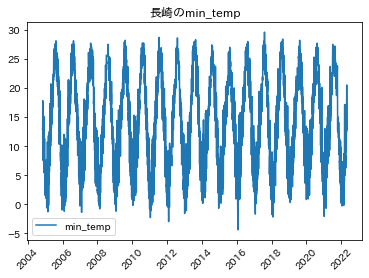

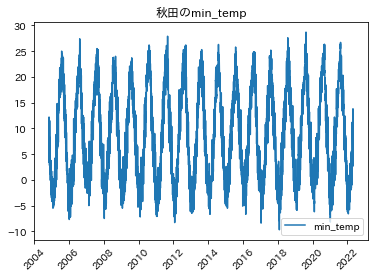

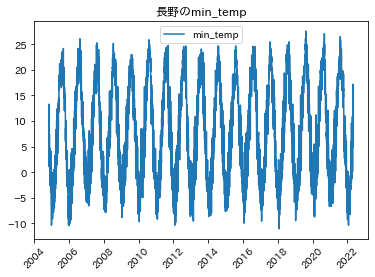

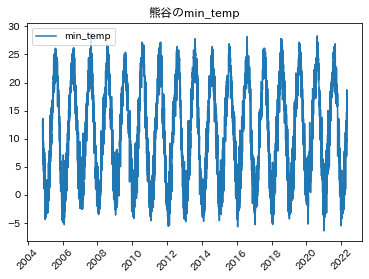

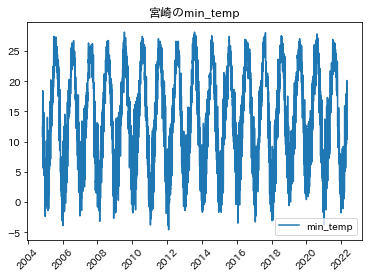

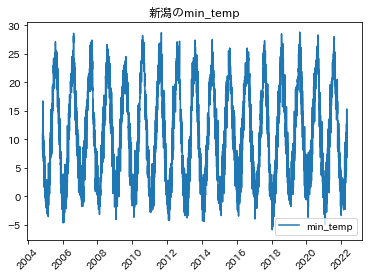

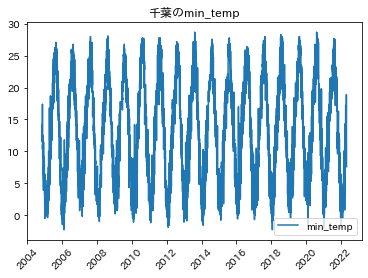

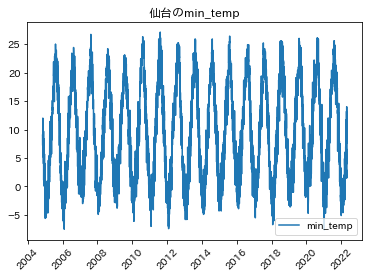

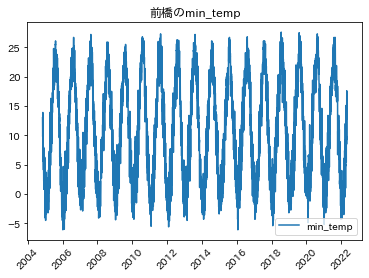

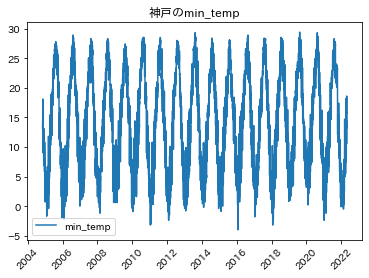

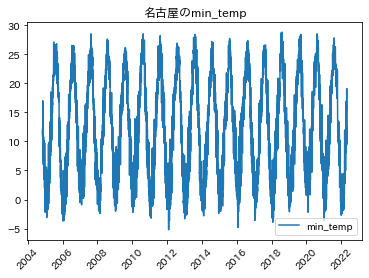

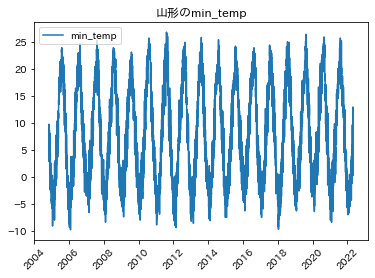

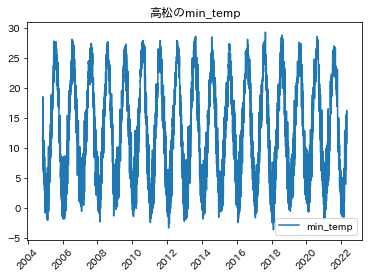

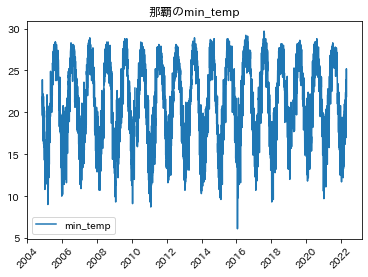

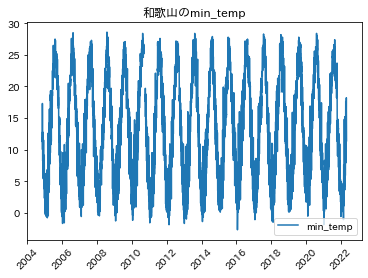

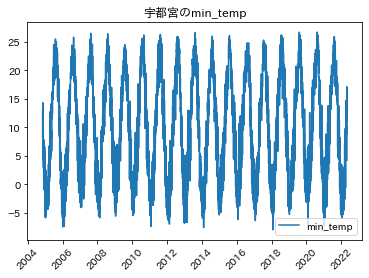

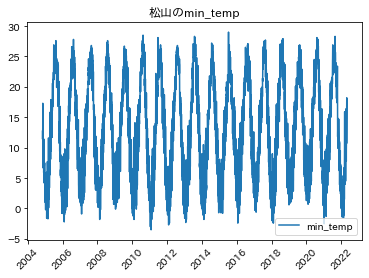

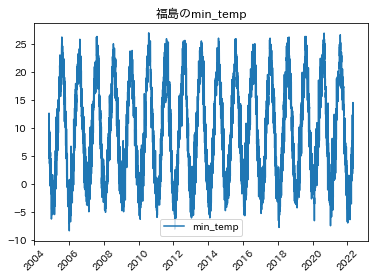

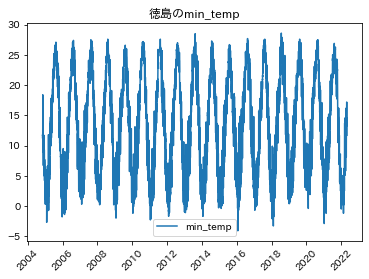

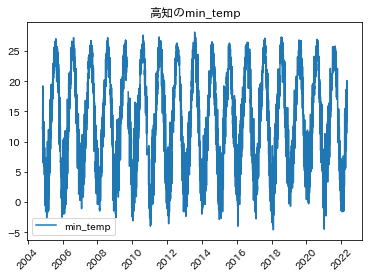

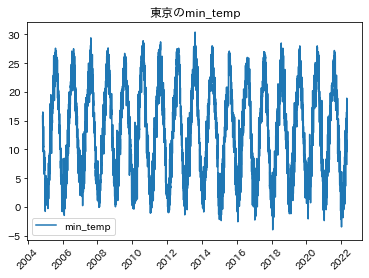

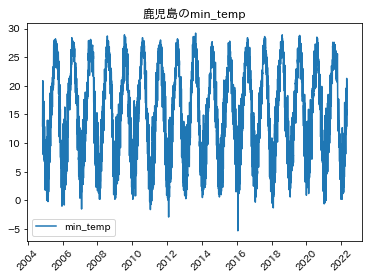

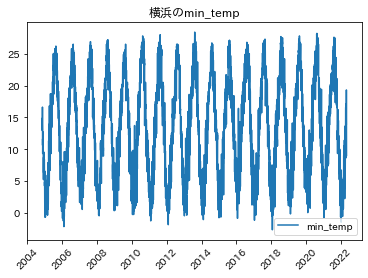

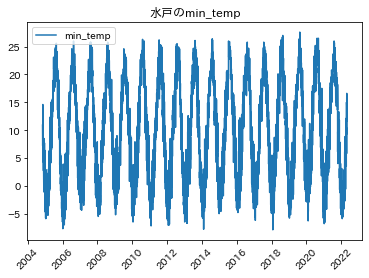

In [52]:
for col in weather_plot_df.columns.values:
    for area in weather['area'].unique():
        plt.figure()
        plt.plot(weather[weather['area']==area][col])
        plt.title(f'{area}の{col}')
        plt.xticks(rotation=45)
        plt.legend([col])

### 各地区の'sum_rain','sun_time','mean_humid'を描画

In [53]:
weather_plot_df = weather[['sum_rain','sun_time','mean_humid']]

C:\Users\09de1\AppData\Local\Temp\ipykernel_18612\1102597399.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


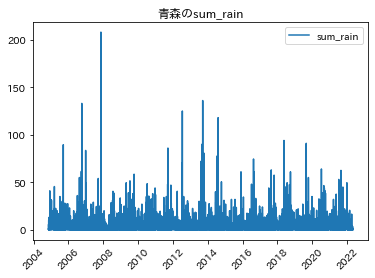

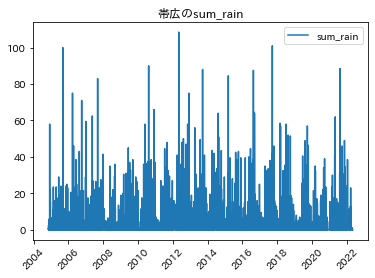

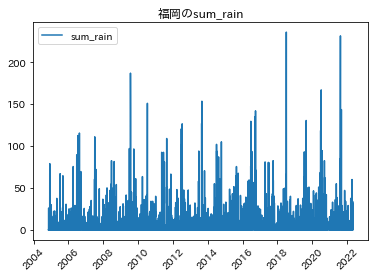

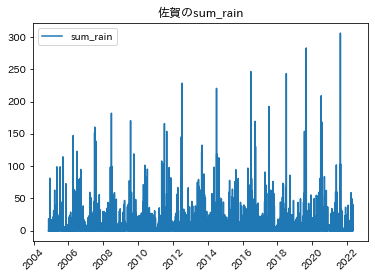

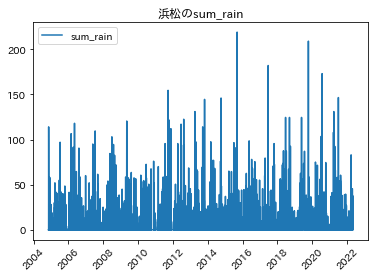

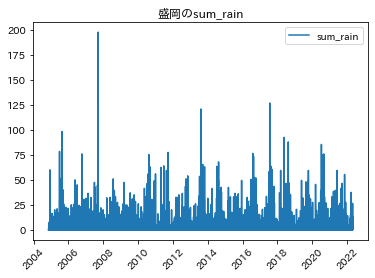

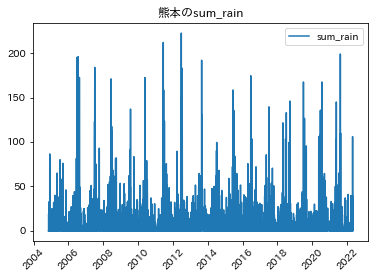

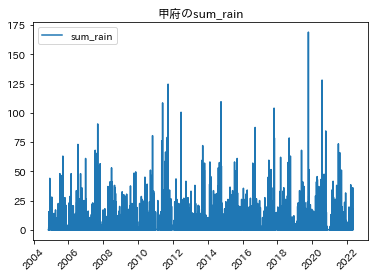

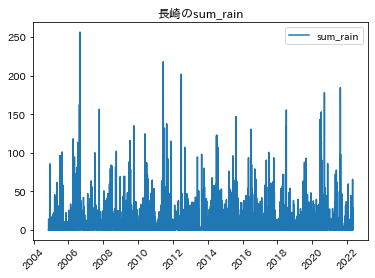

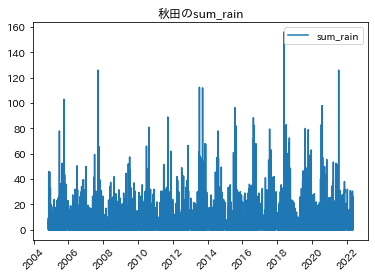

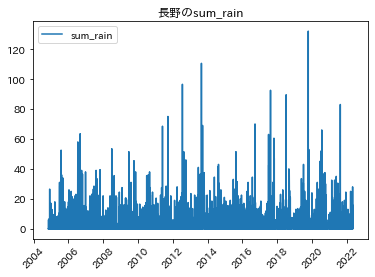

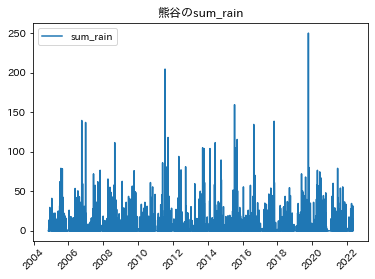

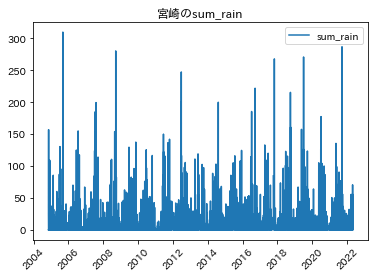

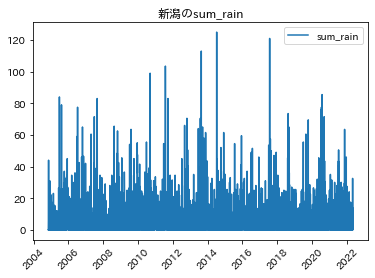

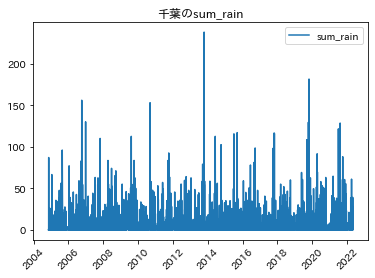

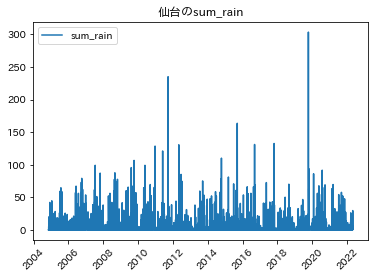

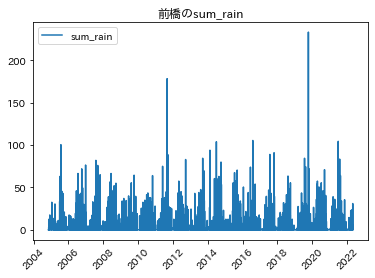

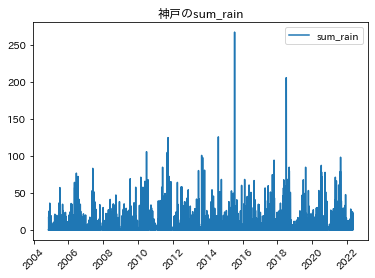

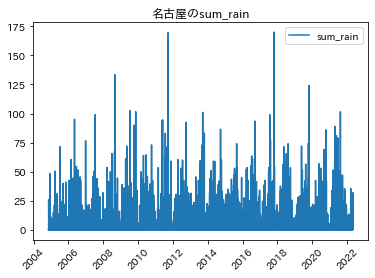

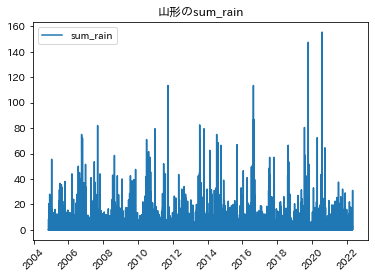

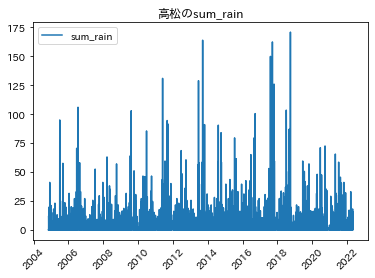

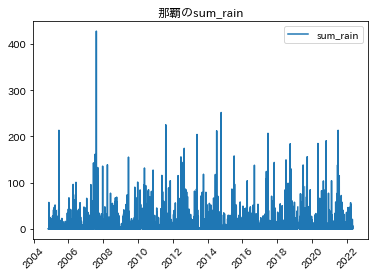

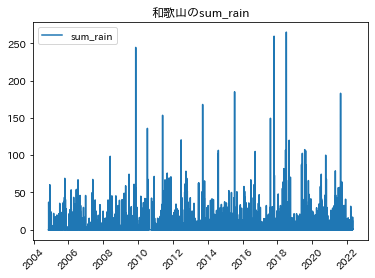

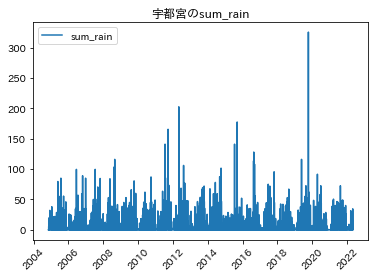

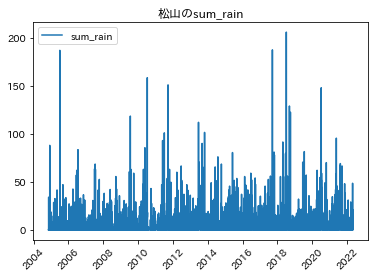

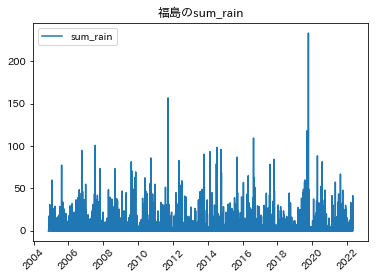

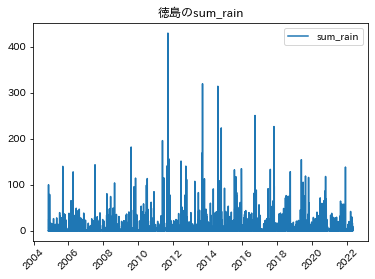

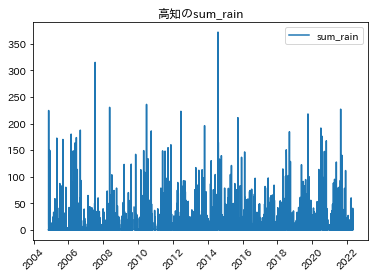

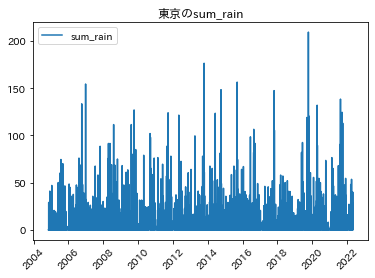

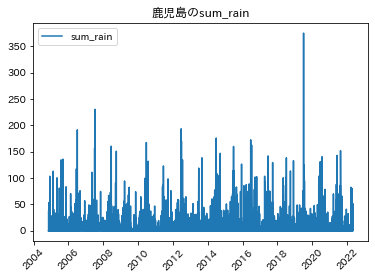

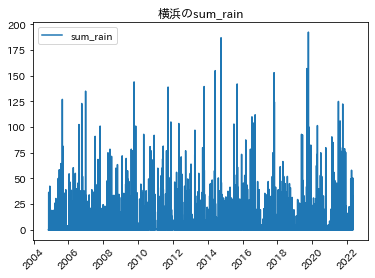

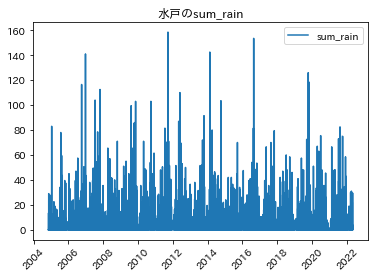

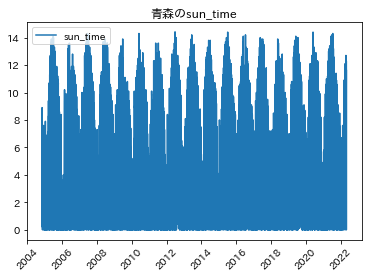

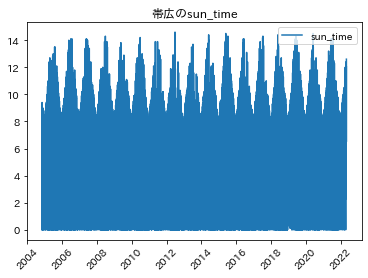

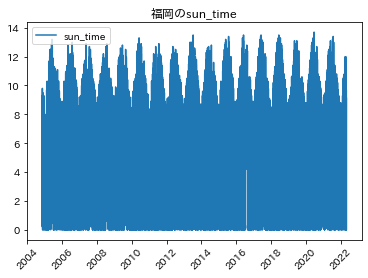

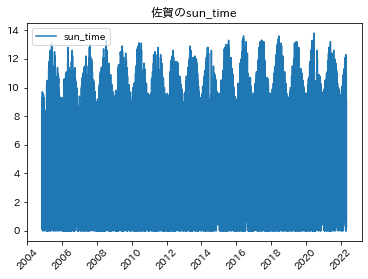

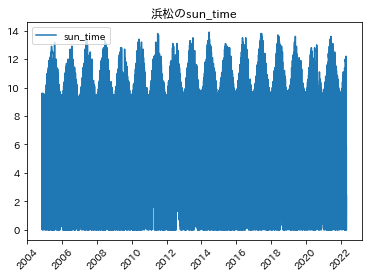

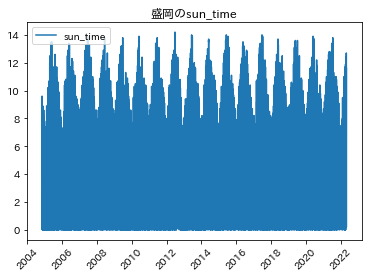

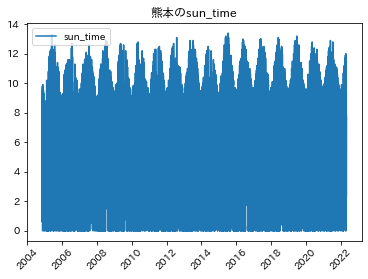

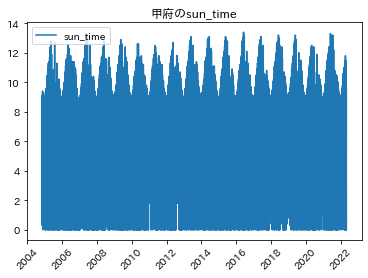

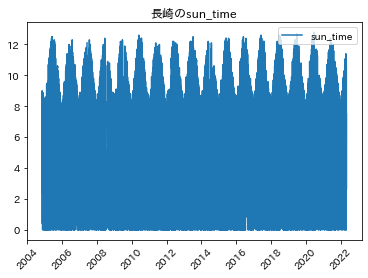

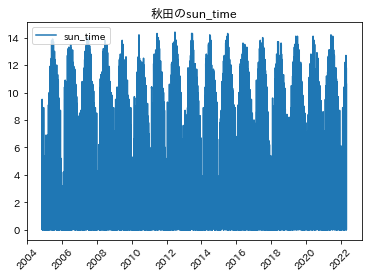

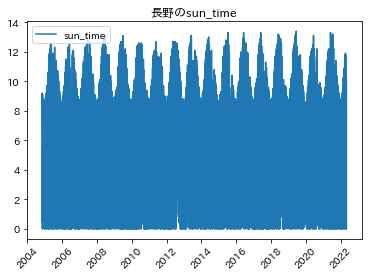

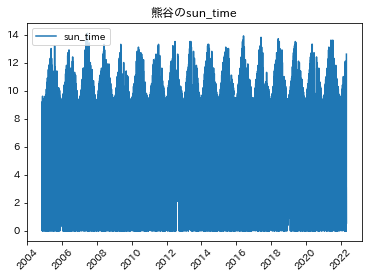

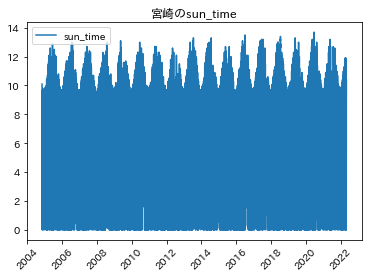

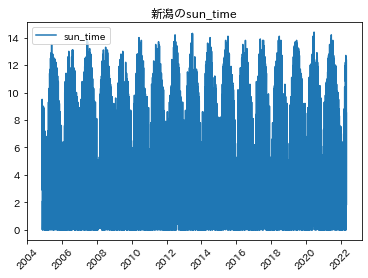

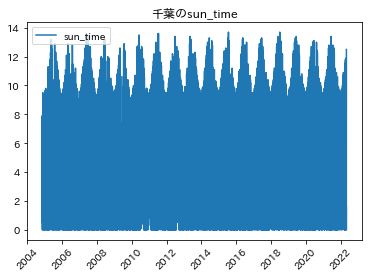

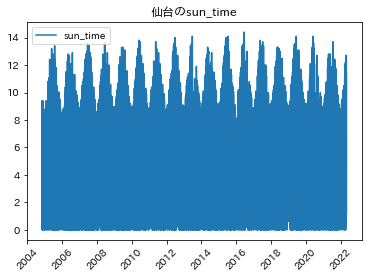

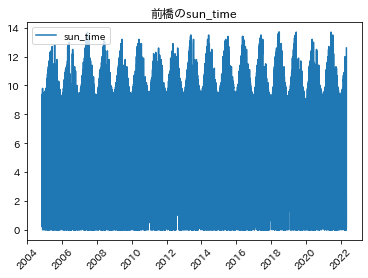

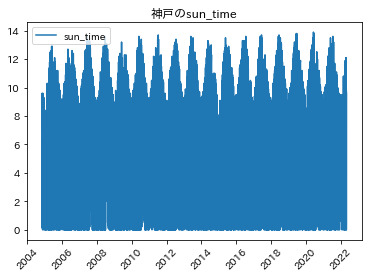

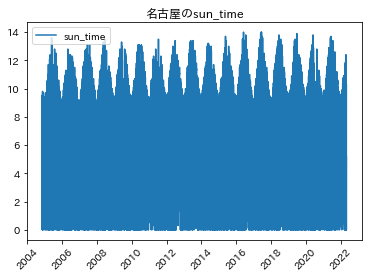

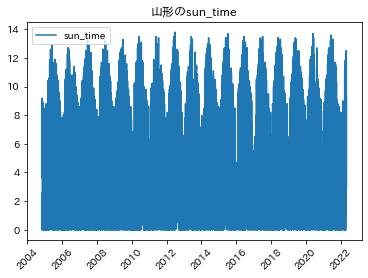

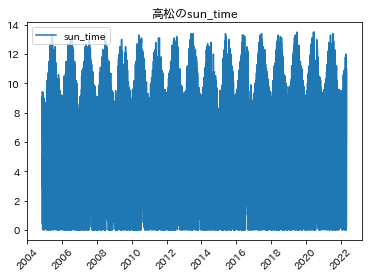

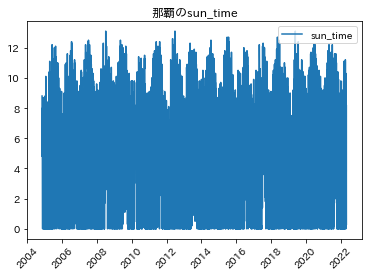

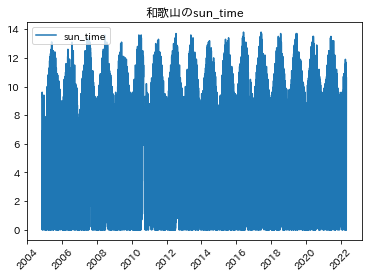

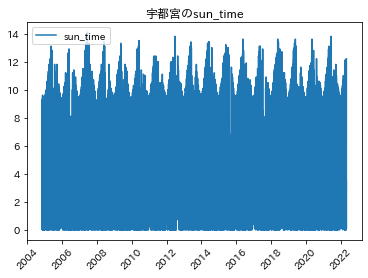

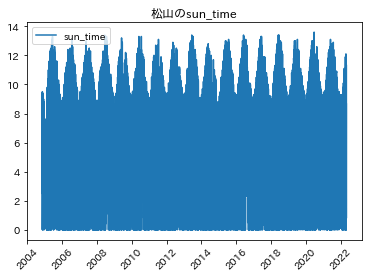

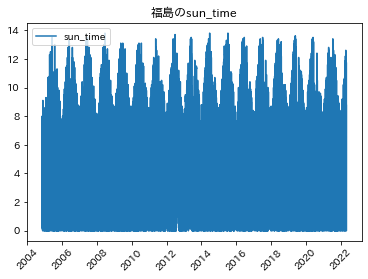

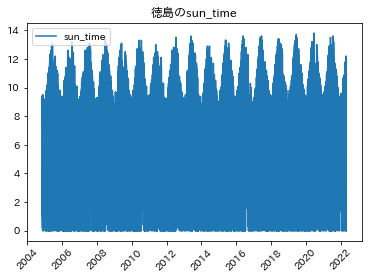

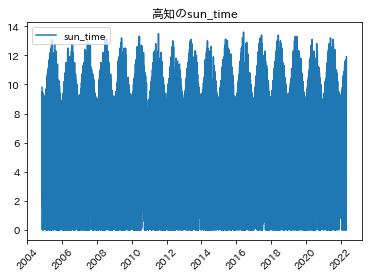

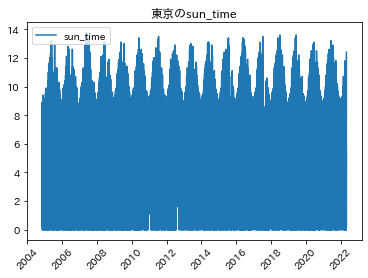

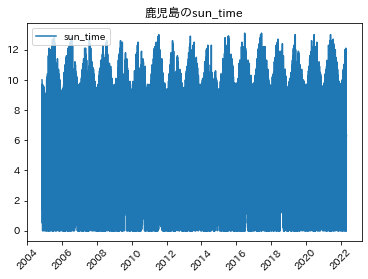

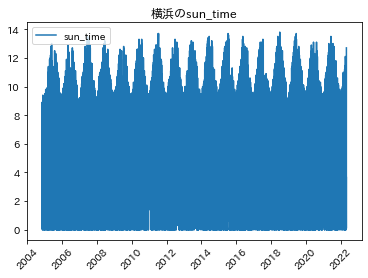

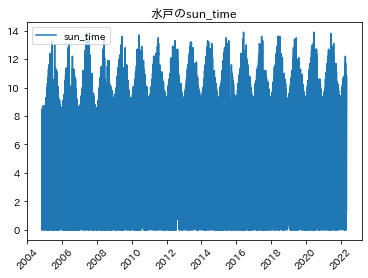

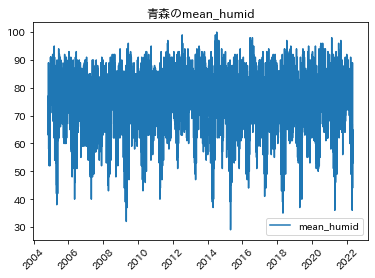

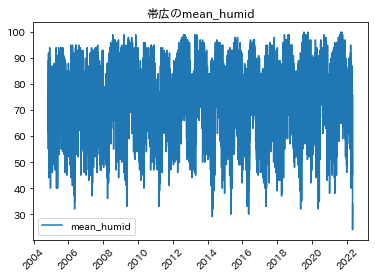

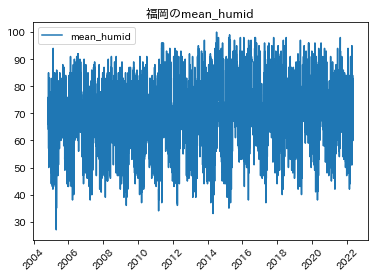

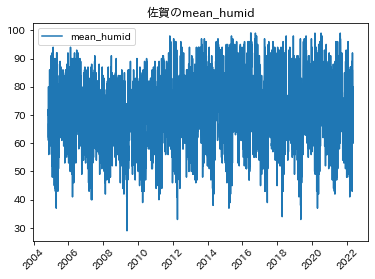

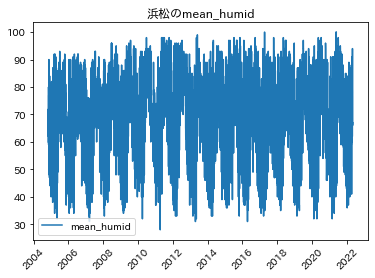

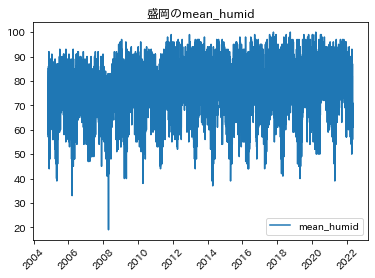

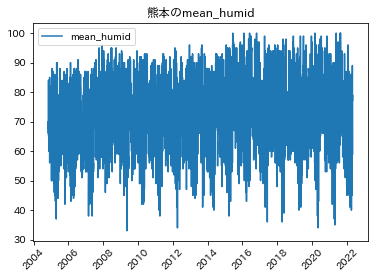

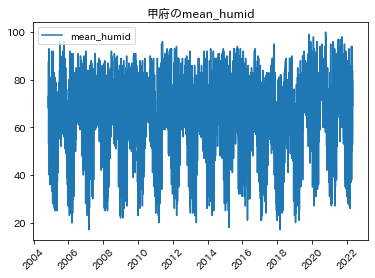

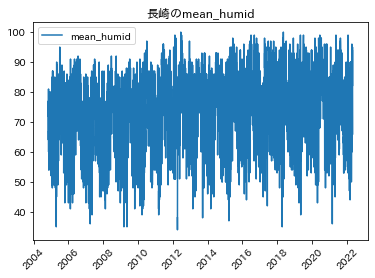

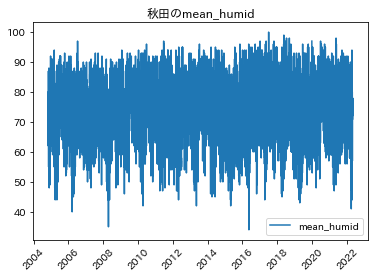

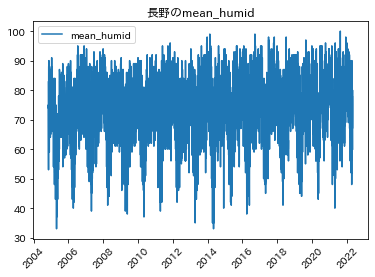

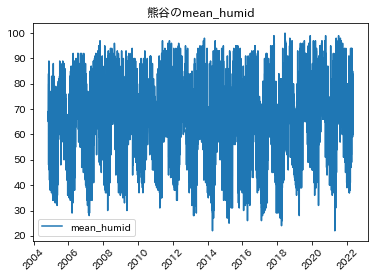

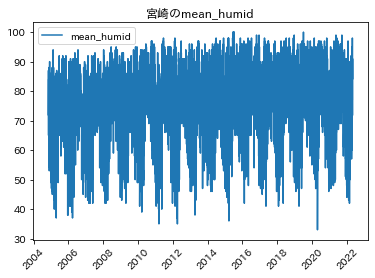

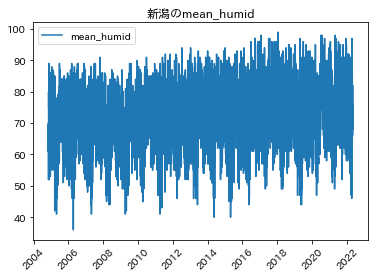

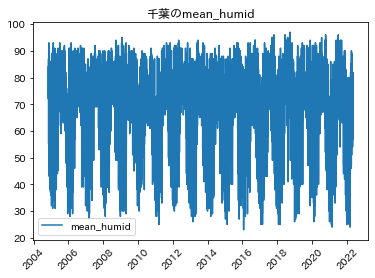

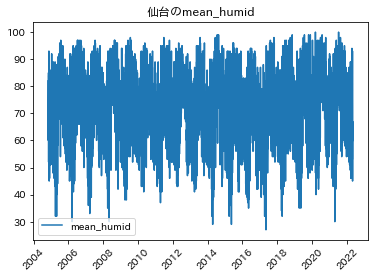

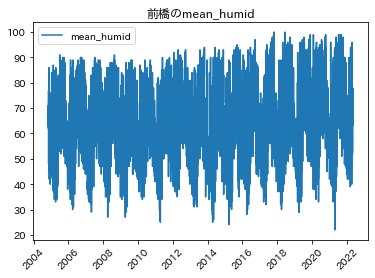

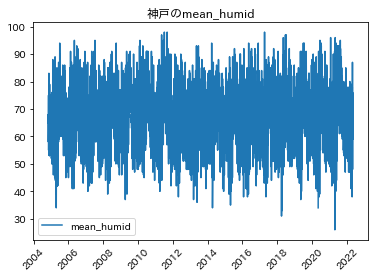

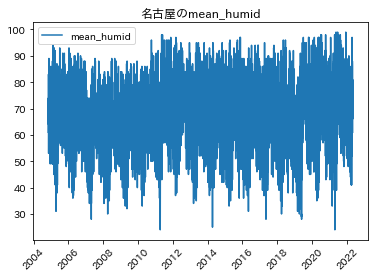

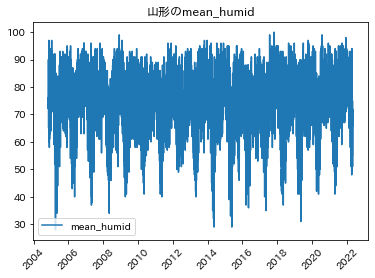

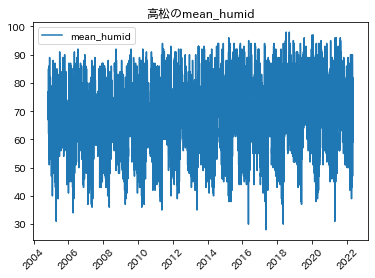

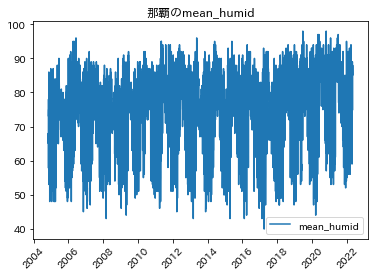

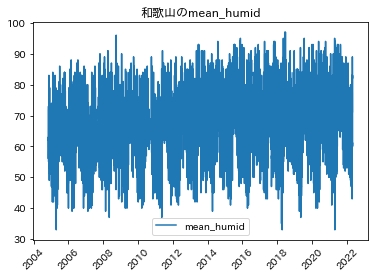

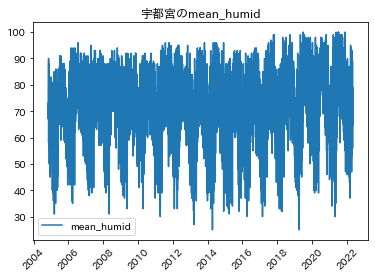

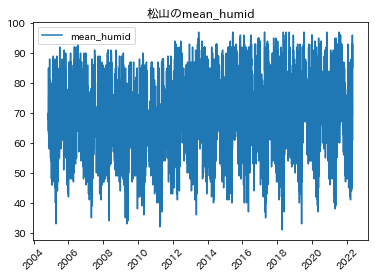

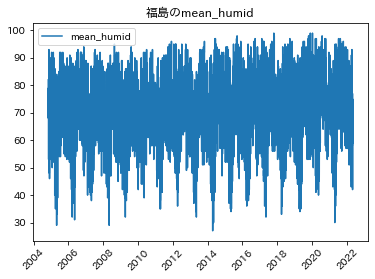

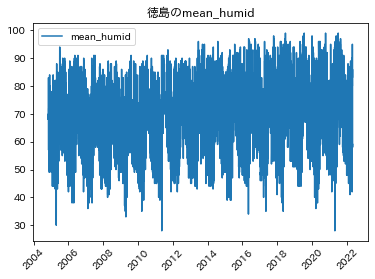

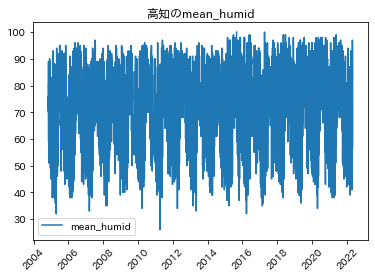

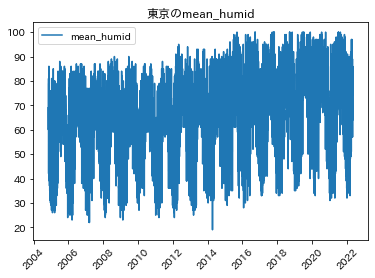

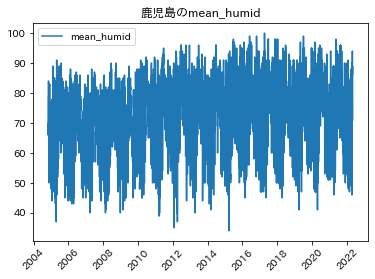

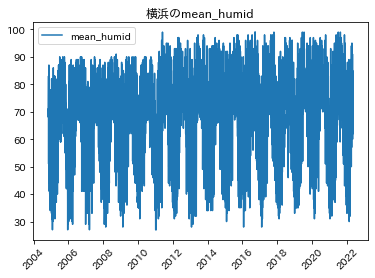

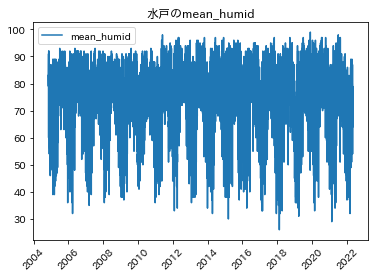

In [54]:
for col in weather_plot_df.columns.values:
    for area in weather['area'].unique():
        plt.figure()
        plt.plot(weather[weather['area']==area][col])
        plt.title(f'{area}の{col}')
        plt.xticks(rotation=45)
        plt.legend([col])

### null値の行を確認

In [55]:
weather.isnull().sum()

mean_temp        367
max_temp         367
max_temp_time    367
min_temp         368
min_temp_time    368
sum_rain         369
sun_time         432
mean_humid       398
area               0
dtype: int64

In [56]:
weather[weather['mean_humid'].isnull()]

mean_temp  max_temp       max_temp_time  min_temp  \
date                                                            
2008-07-07        NaN       NaN                 NaT       NaN   
2008-07-08        NaN       NaN                 NaT       NaN   
2008-07-09        NaN       NaN                 NaT       NaN   
2008-07-10        NaN       NaN                 NaT       NaN   
2008-07-11        NaN       NaN                 NaT       NaN   
...               ...       ...                 ...       ...   
2019-04-06        NaN       NaN                 NaT       NaN   
2019-12-27        1.8       3.4 2019-12-27 07:21:00      -0.2   
2020-05-06       20.5      23.9 2020-05-06 14:59:00      16.1   
2020-12-10        9.3      16.7 2020-12-10 13:17:00       2.3   
2021-06-20       22.9      27.3 2021-06-20 12:41:00      19.7   

                 min_temp_time  sum_rain  sun_time  mean_humid area  
date                                                                 
2008-07-07                 NaT       NaN       NaN         NaN   長崎  
2008-07-08                 NaT       NaN       NaN         NaN   長崎  
2008-07-09                 NaT       NaN       NaN         NaN   長崎  
2008-07-10                 NaT       NaN       NaN         NaN   長崎  
2008-07-11                 NaT       NaN       NaN         NaN   長崎  
...                        ...       ...       ...         ...  ...  
2019-04-06                 NaT       NaN       NaN         NaN   那覇  
2019-12-27 2019-12-27 20:41:00      25.0       0.6         NaN   秋田  
2020-05-06 2020-05-06 23:58:00       0.0       0.1         NaN   神戸  
2020-12-10 2020-12-10 06:22:00       0.0       7.4         NaN   熊本  
2021-06-20 2021-06-20 03:52:00      13.5       1.6         NaN   横浜  

[398 rows x 9 columns]

In [57]:
weather = weather.reset_index()
weather

date  mean_temp  max_temp       max_temp_time  min_temp  \
0      2004-11-06       13.1      20.1 2004-11-06 12:50:00       8.1   
1      2004-11-06        8.5       9.5 2004-11-06 21:18:00       7.3   
2      2004-11-06       17.4      22.5 2004-11-06 14:12:00      12.7   
3      2004-11-06       15.8      21.5 2004-11-06 13:57:00      10.2   
4      2004-11-06       17.9      23.0 2004-11-06 13:23:00      14.7   
...           ...        ...       ...                 ...       ...   
204315 2022-04-30       15.3      19.4 2022-04-30 13:09:00      12.8   
204316 2022-04-30       15.8      21.7 2022-04-30 15:18:00      12.9   
204317 2022-04-30       14.9      19.7 2022-04-30 15:31:00      11.4   
204318 2022-04-30       11.0      17.4 2022-04-30 16:54:00       5.4   
204319 2022-04-30       12.6      18.4 2022-04-30 14:49:00       7.4   

             min_temp_time  sum_rain  sun_time  mean_humid area  
0      2004-11-06 05:31:00       5.0       1.6        77.0   青森  
1      2004-11-06 10:09:00       0.5       0.0        89.0   帯広  
2      2004-11-06 06:56:00       0.0       9.2        66.0   福岡  
3      2004-11-06 06:41:00       0.0       8.5        70.0   佐賀  
4      2004-11-06 04:23:00       0.0       8.6        60.0   浜松  
...                    ...       ...       ...         ...  ...  
204315 2022-04-30 00:09:00       0.0       9.1        60.0   福岡  
204316 2022-04-30 01:06:00       0.0       9.0        60.0   佐賀  
204317 2022-04-30 05:15:00       0.5      10.6        61.0  和歌山  
204318 2022-04-30 05:28:00       0.0      10.2        60.0   長野  
204319 2022-04-30 05:28:00       0.0      12.4        64.0   東京  

[204320 rows x 10 columns]

In [58]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204320 entries, 0 to 204319
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date           204320 non-null  datetime64[ns]
 1   mean_temp      203953 non-null  float64       
 2   max_temp       203953 non-null  float64       
 3   max_temp_time  203953 non-null  datetime64[ns]
 4   min_temp       203952 non-null  float64       
 5   min_temp_time  203952 non-null  datetime64[ns]
 6   sum_rain       203951 non-null  float64       
 7   sun_time       203888 non-null  float64       
 8   mean_humid     203922 non-null  float64       
 9   area           204320 non-null  object        
dtypes: datetime64[ns](3), float64(6), object(1)
memory usage: 15.6+ MB


# EDAまとめ

・trainデータ→期間：2005-11-07 ~ 2022-04-30

・testデータ→期間：2022-05-02 ~ 2022-05-31

・weatherデータ→期間：2004-11-06 ~ 2022-04-30	

# 仮説立て

・季節性かなり有り？

・amount少ないと価格少ない？

・産地も価格に与える影響大きい？

・amountの予測値を特徴量にしてpriceを予測？

・weatherデータとマージして特徴量作成？

# LSTM

## だいこん単体の予測

In [72]:
df_daikon = train[train['kind']=='だいこん'][['date', 'mode_price']].set_index('date')
df_daikon

mode_price
date                  
2005-11-07       735.0
2005-11-08       840.0
2005-11-10       735.0
2005-11-11       682.5
2005-11-12       682.5
...                ...
2022-04-25       864.0
2022-04-26       756.0
2022-04-28       864.0
2022-04-29       918.0
2022-04-30       864.0

[4375 rows x 1 columns]

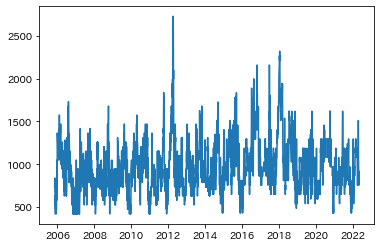

In [74]:
plt.plot(df_daikon.index, df_daikon['mode_price'])

In [81]:
def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
    first_date = str_to_datetime(first_date_str)
    last_date = str_to_datetime(last_date_str)
    
    target_date = first_date
    
    dates = []
    X, Y = [], []
    
    last_time = False
    while True:
        df_subset = dataframe.loc[:target_date].tail(n+1)
        
        if len(df_subset) != n+1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return
        
        values = df_subset['mode_price'].to_numpy()
        x, y = values[:-1], values[-1]
        
        dates.append(target_date)
        X.append(x)
        Y.append(y)
        
        next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year_month_day = next_date_str.split('-')
        year, month, day = year_month_day
        next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
        
        if last_time:
            break
        
        target_date = next_date
        
        if target_date == last_date:
            last_time = True
            
    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates

    X = np.array(X)
    for i in range(0, n):
        X[:,i]
        ret_df[f'Target-{n-i}'] = X[:, i]

    ret_df['Target'] = Y

    return ret_df

In [82]:
# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df_daikon,
                               '2021-04-30',
                               '2022-04-30',
                               n=3)

In [83]:
windowed_df

Target Date  Target-3  Target-2  Target-1  Target
0    2021-04-30     864.0     864.0     864.0   972.0
1    2021-05-01     864.0     864.0     972.0   972.0
2    2021-05-03     864.0     972.0     972.0   972.0
3    2021-05-06     972.0     972.0     972.0   972.0
4    2021-05-07     972.0     972.0     972.0   972.0
..          ...       ...       ...       ...     ...
250  2022-04-25    1026.0     972.0     918.0   864.0
251  2022-04-26     972.0     918.0     864.0   756.0
252  2022-04-28     918.0     864.0     756.0   864.0
253  2022-04-29     864.0     756.0     864.0   918.0
254  2022-04-30     756.0     864.0     918.0   864.0

[255 rows x 5 columns]

In [84]:
def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()
    
    dates = df_as_np[:, 0]
    
    middle_matrix = df_as_np[:, 1: -1]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))
    
    Y = df_as_np[:, -1]
    
    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)
dates.shape, X.shape, y.shape

((255,), (255, 3, 1), (255,))

In [85]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

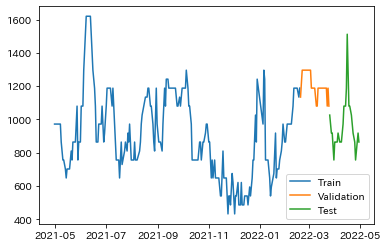

In [86]:
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train','Validation','Test'])

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                   layers.LSTM(64),
                   layers.Dense(32, activation='relu'),
                   layers.Dense(32, activation='relu'),
                   layers.Dense(1)])

model.compile(loss='mse',
             optimizer=Adam(learning_rate=0.001),
             metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 4s 161ms/step - loss: 878495.4375 - mean_absolute_error: 903.7185 - val_loss: 1452282.2500 - val_mean_absolute_error: 1202.8280
Epoch 2/100
7/7 [==============================] - 0s 11ms/step - loss: 877719.6875 - mean_absolute_error: 903.2926 - val_loss: 1451633.7500 - val_mean_absolute_error: 1202.5585
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 877286.1250 - mean_absolute_error: 903.0534 - val_loss: 1451037.5000 - val_mean_absolute_error: 1202.3105
Epoch 4/100
7/7 [==============================] - 0s 11ms/step - loss: 876790.1250 - mean_absolute_error: 902.7762 - val_loss: 1450249.2500 - val_mean_absolute_error: 1201.9828
Epoch 5/100
7/7 [==============================] - 0s 11ms/step - loss: 876111.6250 - mean_absolute_error: 902.4012 - val_loss: 1449047.6250 - val_mean_absolute_error: 1201.4825
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 874897.0000 - mean_absolute_error: 90

7/7 [==============================] - 1s 3ms/step


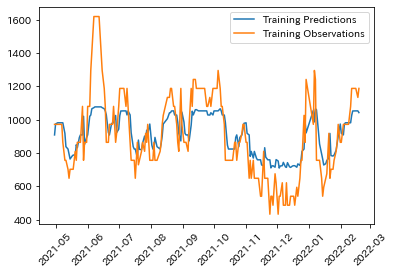

In [88]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.xticks(rotation=45)
plt.legend(['Training Predictions', 'Training Observations'])

In [89]:
pd.DataFrame({'Date':dates[:q_80], 'Target(Close)':y_train,'Prediction':train_predictions})

Date  Target(Close)   Prediction
0   2021-04-30          972.0   908.462341
1   2021-05-01          972.0   974.019592
2   2021-05-03          972.0   981.470520
3   2021-05-06          972.0   981.455505
4   2021-05-07          972.0   981.455505
..         ...            ...          ...
199 2022-02-12         1188.0  1052.423096
200 2022-02-14         1188.0  1052.976562
201 2022-02-15         1188.0  1052.976196
202 2022-02-17         1134.0  1052.976196
203 2022-02-18         1188.0  1042.679688

[204 rows x 3 columns]

1/1 [==============================] - 0s 32ms/step


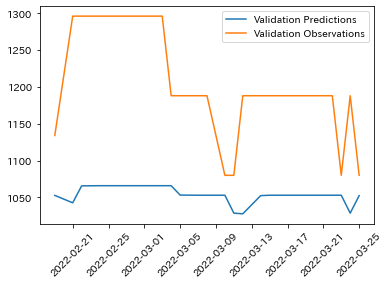

In [90]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.xticks(rotation=45)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 29ms/step


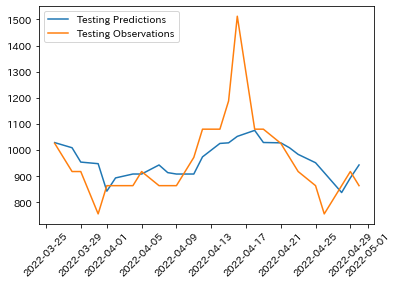

In [91]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.xticks(rotation=45)
plt.legend(['Testing Predictions','Testing Observations'])

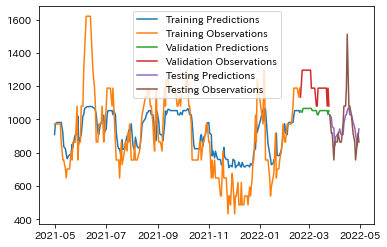

In [92]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
           'Training Observations',
           'Validation Predictions',
           'Validation Observations',
           'Testing Predictions',
           'Testing Observations'])

In [93]:
from copy import deepcopy

In [94]:
recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
    last_window = deepcopy(X_train[-1])
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window[-1] = next_prediction

1/1 [==============================] - 0s 24ms/step


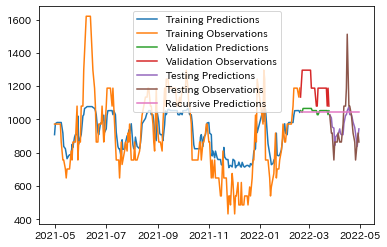

In [95]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
           'Training Observations',
           'Validation Predictions',
           'Validation Observations',
           'Testing Predictions',
           'Testing Observations',
           'Recursive Predictions'])